# DỰ ĐOÁN GIÁ LAPTOP

## 1. Giới thiệu

* Ngày nay, cùng với sự phát triển của khoa học và công nghệ thì các thiết bị thông minh nói chung và laptop nói riêng đã trở thành một công cụ hữu ích không thể thiếu, phục vụ trong các nhu cầu học tập, làm việc cho đến việc giải trí càng khiến cho thị trường laptop ngày càng nóng lên. Việc lựa chọn một chiếc laptop sao cho phù hợp với nhu cầu và túi tiền không phải là điều dễ dàng đối với nhiều người. 
* Nắm bắt được nhu cầu cũng như tâm lý người dùng, nhóm tụi em đã ứng dụng những kiến thức đã học trong bộ môn Khoa học dữ liệu để xây dựng mô hình “Dự đoán giá laptop” trên tập dữ liệu được lấy từ trang website mua bán laptop nổi tiếng là [www.chotot.com/mua-ban-laptop](https://www.chotot.com/mua-ban-laptop)

* Giải pháp của nhóm là sẽ sử dụng các công cụ như Selenium để hỗ trợ cào dữ liệu, sau đó xây dựng các mô hình hồi quy tuyến tính nhằm dự đoán giá laptop kết hợp với các kĩ thuật xử lý dữ liệu trống, dữ liệu ngoại lệ.


## 2. Thu thập và mô tả dữ liệu

*   Cào dữ liệu từ trang [www.chotot.com/mua-ban-laptop](https://www.chotot.com/mua-ban-laptop)
*   Gộp dữ liệu và làm sạch dữ liệu


### 2.1 Cào dữ liệu

Để cào dữ liệu laptop từ trang web kể trên, sẽ có **2 bước xử lí chính**:


1.   Duyệt qua tất cả trang sản phẩm ở trang danh sách sản phẩm để lấy tất cả đường link chi tiết sản phẩm
2.   Truy cập vào từng đường link đã thu thập ở bước 1, tiến hành phân tích trang sản phẩm chi tiết để lấy các dữ liệu cần thiết

Kết quả: 1 file csv chứa dữ liệu thô
  * laptop.csv

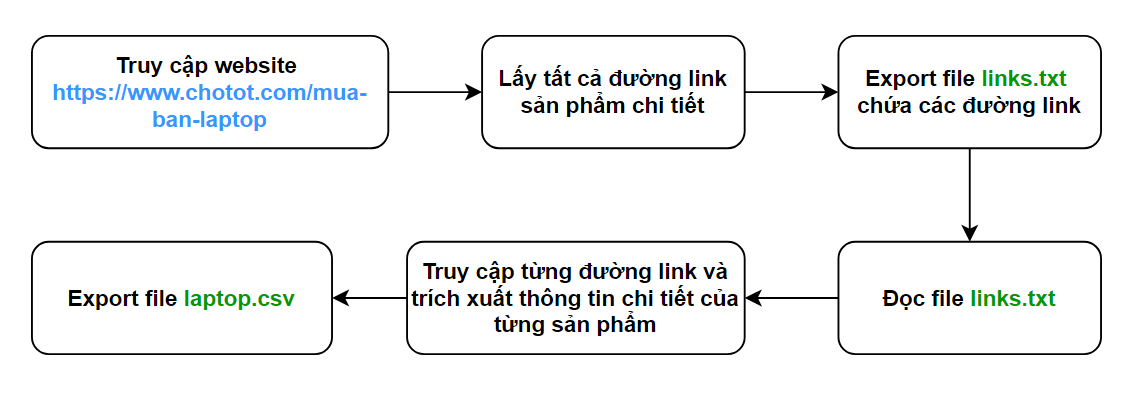

### Chạy script của mô-đun crawler  

Trích xuất link tại mỗi trang

In [1]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import os

# Khởi tạo trình duyệt
s = Service('crawler/driver_chrome/chromedriver.exe')
driver = webdriver.Chrome(service=s)

driver.get("https://www.chotot.com/mua-ban-laptop")
time.sleep(0.5)

# Click button để tắt modal thông báo đăng tin trong trang 
try:
    close_button = driver.find_element(By.CSS_SELECTOR,'.aw__s1k4y3yn')
    if close_button.is_displayed():
        close_button.click()
        time.sleep(0.5)
except NoSuchElementException: 
    pass

# Ghi các link vào file links.txt (test/official) 
# Mỗi page có 25 sản phẩm tương ứng với 25 link 
with open("raw data/test/links.txt", "a", encoding="utf-8") as f: 
    page_start = 1
    page_end = 2
    for i in range(page_start, page_end):
        driver.get("https://www.chotot.com/mua-ban-laptop?page="+str(i))
        time.sleep(0.5)
        a_elements = []
        a_elements = driver.find_elements(By.CSS_SELECTOR,"[class='AdItem_wrapperAdItem__S6qPH  AdItem_big__70CJq'] > a")
        for a in a_elements:
            f.write(a.get_attribute('href') + "\n")
            
# Đóng trình duyệt
driver.quit()


Trích xuất thông tin chi tiết của từng sản phẩm

In [2]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import os 

# Khởi tạo trình duyệt
s = Service('crawler/driver_chrome/chromedriver.exe')
driver = webdriver.Chrome(service=s)

driver.get("https://www.chotot.com/mua-ban-laptop")
time.sleep(0.5)

# Click button để tắt modal thông báo đăng tin trong trang 
try:
    close_button = driver.find_element(By.CSS_SELECTOR,'.aw__s1k4y3yn')
    if close_button.is_displayed(): 
        close_button.click()
        time.sleep(0.5)
except NoSuchElementException:
    pass

# Đọc tất cả các dòng trong file links.txt
links = []
with open('raw data/test/links.txt', 'r') as file:
    links = file.readlines()

# Hàm get value 
def find_value_by_itemprop(driver, itemprop):
    try:
        element = driver.find_element(By.CSS_SELECTOR, f'span.AdParam_adParamValue__IfaYa[itemprop="{itemprop}"]')
        return element.text
    except:
        return None

list_laptop = []

# Lặp qua các link trong file links.txt
link_start = 0
link_end = 10
for link in links[link_start:link_end]:

    # Truy cập đến sản phẩm tương ứng với link 
    driver.get(link.strip()) 

    # Lấy dữ liệu các đặc tính của sản phẩm
    ProductName = None 
    try:
        ProductName = driver.find_element(By.CSS_SELECTOR, '.AdDecription_adTitle__AG9r4').text
    except:
        pass
    Price = None 
    try:
        Price = driver.find_element(By.CSS_SELECTOR, 'span[itemprop="price"]').text
    except:
        pass
    PcBrand = find_value_by_itemprop(driver,'pc_brand') 
    PcModel = find_value_by_itemprop(driver,'pc_model') 
    EltCondition = find_value_by_itemprop(driver,'elt_condition') 
    EltWarranty = find_value_by_itemprop(driver,'elt_warranty') 
    LaptopScreenSize = find_value_by_itemprop(driver,'laptop_screen_size') 
    PcCpu = find_value_by_itemprop(driver,'pc_cpu') 
    PcRam = find_value_by_itemprop(driver,'pc_ram') 
    PcVga = find_value_by_itemprop(driver,'pc_vga') 
    PcDriveCapacity = find_value_by_itemprop(driver,'pc_drive_capacity') 
    EltOrigin = find_value_by_itemprop(driver,'elt_origin') 
    PcDriveType = find_value_by_itemprop(driver,'pc_drive_type') 
    Address = None 
    try:
        Address = driver.find_element(By.CSS_SELECTOR, '.media-body.media-middle.AdParam_address__5wp1F > span').text
    except:
        pass
    NameShop = None 
    try:
        NameShop = driver.find_element(By.CSS_SELECTOR, '.SellerProfile_nameDiv__sjPxP > b').text
    except:
        pass
    # Tìm thấy link của shop hoặc cá nhân rồi click vào để đi đến đó 
    try:
        link_shop = driver.find_element(By.CSS_SELECTOR, '.SellerProfile_inforWrapper__KXg71 > a')
        driver.get(link_shop.get_attribute('href'))
    except:
        pass
    # Cửa hàng 
    ShopRating = None 
    try:
        ShopRating = driver.find_element(By.CSS_SELECTOR, '.flex.items-center.justify-center.gap-3 > .text-2xl.font-bold').text
    except:
        pass

    Comments = None 
    try:
        Comments = driver.find_element(By.CSS_SELECTOR, '.flex.items-center.gap-2.px-3 .text-darkblue-2').text
    except:
        pass
    # Cá nhân (Nếu không phải cửa hàng thì là cá nhân)
    if(ShopRating == None):
        try:
            ShopRating = driver.find_element(By.CSS_SELECTOR, '.ratingInfo.r8rxioc .rymcx98').text
        except:
            pass
    if(Comments == None): 
        try:
            Comments = driver.find_element(By.CSS_SELECTOR, '.ratingInfo.r8rxioc > a').text
        except:
            pass
    list_laptop.append([ProductName,Price,PcBrand,PcModel,EltCondition,EltWarranty,LaptopScreenSize,PcCpu,PcRam,PcVga,PcDriveCapacity,EltOrigin,PcDriveType,Address,NameShop,ShopRating,Comments])

# Đóng trình duyệt
driver.quit()

# Ghi thông tin các laptop vào file laptop.csv (test/official)
df_laptop = pd.DataFrame(list_laptop, columns=['ProductName', 'Price', 'PcBrand', 'PcModel', 'EltCondition', 'EltWarranty', 'LaptopScreenSize', 'PcCpu', 'PcRam', 'PcVga', 'PcDriveCapacity', 'EltOrigin', 'PcDriveType', 'Address','NameShop','ShopRating','Comments'])
import os.path
import pandas as pd

if os.path.isfile('raw data/test/laptop.csv'):
    df_laptop = pd.read_csv('raw data/test/laptop.csv')
else:
    df_laptop = pd.DataFrame(columns=['ProductName', 'Price', 'PcBrand', 'PcModel', 'EltCondition', 'EltWarranty', 'LaptopScreenSize', 'PcCpu', 'PcRam', 'PcVga', 'PcDriveCapacity', 'EltOrigin', 'PcDriveType', 'Address','NameShop','ShopRating','Comments'])
df_new = pd.DataFrame(list_laptop, columns=['ProductName', 'Price', 'PcBrand', 'PcModel', 'EltCondition', 'EltWarranty', 'LaptopScreenSize', 'PcCpu', 'PcRam', 'PcVga', 'PcDriveCapacity', 'EltOrigin', 'PcDriveType', 'Address','NameShop','ShopRating','Comments'])
if not os.path.isfile('raw data/test/laptop.csv') or df_laptop.columns.to_list() != df_new.columns.to_list():
    df_new.to_csv('raw data/test/laptop.csv', index=False, mode='a', header=True, encoding='utf-8-sig')
else:
    df_new.to_csv('raw data/test/laptop.csv', index=False, mode='a', header=False, encoding='utf-8-sig')



Source code cào dữ liệu trang [www.chotot.com/mua-ban-laptop](https://www.chotot.com/mua-ban-laptop) ở thư mục `crawler` \
Dữ liệu cào thử nghiệm ở thư mục `raw data/test` \
Dữ liệu cào chính thức ở 2 file `raw data/laptop.csv` và `raw data/link.txt`
#### Kết quả thu được ở bước 2.1 là file dữ liệu thô laptop.csv chứa gần 20.000 mẫu dữ liệu

### 2.2 Làm sạch dữ liệu và chia tập dữ liệu thành SmallDS, BigDS 
1. Làm sạch dữ liệu: Sau khi có file chứa dữ liệu thô thì tiếp đến ta cần phải tiến hành làm sạch dữ liệu như:
  * Loại bỏ các mẫu có nhiều dữ liệu trống 
  * Loại bỏ các đặc trưng không cần thiết, gây nhiễu 
  * Định dạng và ép kiểu dữ liệu thích hợp

2. Chia tập dữ liệu thành SmallDS và BigDS \
**Đầu vào**: file **laptop.csv** đã được làm sạch ở bước 2.1 \
**Kết quả**: file **BigDS.csv** và **SmallDS.csv**

#### 2.2.1 Làm sạch dữ liệu

Import các thư viện cần thiết

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest


Dữ liệu trước khi làm sạch

In [4]:
df = pd.read_csv('raw data/laptop.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19988 entries, 0 to 19987
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductName       19168 non-null  object 
 1   Price             19167 non-null  object 
 2   PcBrand           19167 non-null  object 
 3   PcModel           19164 non-null  object 
 4   EltCondition      19168 non-null  object 
 5   EltWarranty       19168 non-null  object 
 6   LaptopScreenSize  14481 non-null  object 
 7   PcCpu             16302 non-null  object 
 8   PcRam             16475 non-null  object 
 9   PcVga             12789 non-null  object 
 10  PcDriveCapacity   15891 non-null  object 
 11  EltOrigin         19168 non-null  object 
 12  PcDriveType       0 non-null      float64
 13  Address           19168 non-null  object 
 14  NameShop          19166 non-null  object 
 15  ShopRating        11668 non-null  float64
 16  Comments          11368 non-null  object

,ProductName,Price,PcBrand,PcModel,EltCondition,EltWarranty,LaptopScreenSize,PcCpu,PcRam,PcVga,PcDriveCapacity,EltOrigin,PcDriveType,Address,NameShop,ShopRating,Comments
0,Latitude 5400 Corei7-8665U Ram 8 SSD 256 màn 1...,7.100.000 đ,Dell,Latitude,Đã sử dụng (chưa sửa chữa),Đang cập nhật,NaN,NaN,NaN,NaN,NaN,Đang cập nhật,NaN,"Phường Phú Lãm, Quận Hà Đông, Hà Nội",Anh Hoành,5.0,4 đánh giá
1,Lenovo Legion 5-15ARH7 6800H FHD 165Hz NewFullbox,23.700.000 đ,Lenovo,Legion Y Series,Mới,>12 tháng,15 - 16.9 inch,Ryzen 7,8 GB,NVIDIA,512 GB,Đang cập nhật,NaN,"Phường Tân Thành, Quận Tân Phú, Tp Hồ Chí Minh",Cửa hàng LAPTOP TỐT,5.0,23 nhận xét
2,cần tiền bán laptop ạ,4.000.000 đ,Asus,VivoBook S Series,Đã sử dụng (chưa sửa chữa),Hết bảo hành,15 - 16.9 inch,Intel Core i5,4 GB,Onboard,> 1 TB,Đang cập nhật,NaN,"37 đường 120, Phường Tân Phú (Quận 9 cũ), Thàn...",Nv Dần,NaN,NaN
3,Bán máy tính HP 340S G7,5.000.000 đ,HP,Dòng Khác,Đã sử dụng (chưa sửa chữa),Đang cập nhật,13 - 14.9 inch,Intel Core i3,4 GB,Khác,512 GB,Đang cập nhật,NaN,"Phường 7, Quận Bình Thạnh, Tp Hồ Chí Minh",Namm,NaN,NaN
4,"Macbook Pro 15"" Retina - Chip I7 / Ram 8G / 25...",6.500.000 đ,Apple,Macbook Pro,Đã sử dụng (chưa sửa chữa),Đang cập nhật,NaN,NaN,NaN,NaN,NaN,Đang cập nhật,NaN,"Phường An Cựu, Thành phố Huế, Thừa Thiên Huế",LÊ NGUYỄN LAPTOP LAPTOPHUE COM VN,5.0,9 đánh giá
5,Thanh lý Dell Latitude 3400,5.500.000 đ,Dell,Latitude,Đã sử dụng (chưa sửa chữa),Hết bảo hành,13 - 14.9 inch,Intel Core i5,16 GB,Onboard,256 GB,Đang cập nhật,NaN,"Phường Tân Phú, Quận 7, Tp Hồ Chí Minh",Phương,5.0,1 đánh giá
6,DELL Latutide 7480 i7-6600u 8/256Gb Máy bền - ...,6.490.000 đ,Dell,Latitude,Đã sử dụng (chưa sửa chữa),Đang cập nhật,NaN,Intel Core i7,8 GB,NaN,256 GB,Đang cập nhật,NaN,"Phường 14, Quận 3, Tp Hồ Chí Minh",Tymo Việt Nam,5.0,51 nhận xét
7,ASUS A541 - I7 7500U / 8G / VGA 940M 2G / SSD ✅,7.500.000 đ,Asus,A series,Đã sử dụng (chưa sửa chữa),Đang cập nhật,NaN,NaN,NaN,NaN,NaN,Đang cập nhật,NaN,"Phường An Cựu, Thành phố Huế, Thừa Thiên Huế",LÊ NGUYỄN LAPTOP LAPTOPHUE COM VN,5.0,9 đánh giá
8,Hp Elitebook 1040 g3 I7 6600U,6.000.000 đ,HP,Elitebook,Đã sử dụng (chưa sửa chữa),Đang cập nhật,13 - 14.9 inch,Intel Core i7,16 GB,Onboard,256 GB,Đang cập nhật,NaN,"Xã Hưng Lộc, Huyện Thống Nhất, Đồng Nai",Nguyễn tuấn lộc,2.0,1 đánh giá
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NameShop** : Tên Cửa hàng \
Loại bỏ các đặc trưng NameShop vì không cần thiết và gây nhiễu 

In [5]:
df = df.drop('NameShop', axis=1) 

**PcDriveType** : Kiểu ổ cứng \
Cần phải loại bỏ cột vì toàn bộ cột đều trống (không có dữ liệu để cào)

In [6]:
df = df.drop('PcDriveType', axis=1)

**Price** : Giá của laptop
* Dùng replace để chỉ để lại những chữ số
* Ép sang kiểu số 

In [7]:
df['Price'] = df['Price'].str.replace('.', '').str.replace(' đ', '').astype(float)
df['Price']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6692\315305473.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('.', '').str.replace(' đ', '').astype(float)


0         7100000.0
1        23700000.0
2         4000000.0
3         5000000.0
4         6500000.0
            ...    
19983     2500000.0
19984     2800000.0
19985    18900000.0
19986     1499000.0
19987    15500000.0
Name: Price, Length: 19988, dtype: float64

**EltWarranty** : Thời gian bảo hành
* Thay thế thời gian bảo hành từ chuỗi sang số tương ứng  
* Bản chất của biến EltWarranty là liên tục nhưng do người ta để các khoảng kết quả là nó thành rời rạc

In [8]:
df['EltWarranty'] = df['EltWarranty'].replace({'Đang cập nhật': np.nan,
                                                'Còn bảo hành': 4,
                                                'Hết bảo hành': 0,
                                                '1 tháng': 1,
                                                '2 tháng': 2,
                                                '3 tháng': 3,
                                                '4-6 tháng': 5,
                                                '7-12 tháng': 7,
                                                '>12 tháng': 9})
df['EltWarranty'].unique()

array([nan,  9.,  0.,  1.,  4.,  7.,  3.,  5.,  2.])

**LaptopScreenSize** : Kích thước màn hình 
* Thay `>= 21` inch bằng `19.95`
* Thay `< 9` inch bằng `8.9`
* Còn lại bỏ `inch` rồi tách ra 2 số sau đó tính trung bình 2 số đó 
* Ví dụ `15 - 16.9 inch` => `(15 + 16.9)/2 = 15.95`

In [9]:
def process_screen_size(size):
    if pd.isna(size):
        return np.nan
    elif size == '>= 21 inch':
        return 19.95
    elif size == '< 9 inch':
        return 8.9
    else:
        return sum(map(float, size.replace(' inch', '').split(' - '))) / 2
df['LaptopScreenSize'] = df['LaptopScreenSize'].apply(lambda x: process_screen_size(x))
df['LaptopScreenSize'].unique()


array([  nan, 15.95, 13.95, 17.95, 11.95,  9.95, 19.95,  8.9 ])

**PcRam** : Dung lượng Ram 
* Dùng replace để bỏ `GB` đi 
* Thay `< 1` bằng `0.5`
* Thay `> 32GB` bằng `64`
* Ép kiểu cho tất cả về kiểu số 

In [10]:
df['PcRam'] = df['PcRam'].str.replace(' GB', '')
df['PcRam'] = df['PcRam'].replace({'< 1': '0.5', '> 32GB': '64'}).astype(float)
df['PcRam'].unique()

array([ nan,  8. ,  4. , 16. ,  2. , 32. ,  6. , 64. ,  0.5,  1. ])

**PcDriveCapacity** : Dung lượng ổ cứng
* Xử lý tương tự với `PcRam`

In [11]:
df['PcDriveCapacity'] = df['PcDriveCapacity'].str.replace(' GB', '')
df['PcDriveCapacity'] = df['PcDriveCapacity'].replace({'> 1 TB': '1500', '1 TB': '1000', '< 128': '64'}).astype(float)
df['PcDriveCapacity'].unique()

array([  nan,  512., 1500.,  256.,  128.,  500., 1000.,   64.,  250.,
        700.,  480.,  320.,  750.,  640.])

**EltOrigin** : Nguồn gốc
* Thay `Đang cập nhật` bằng `null`

In [12]:
df['EltOrigin'] = df['EltOrigin'].replace({'Đang cập nhật': np.nan})
df['EltOrigin'].unique()

array([nan, 'Việt Nam', 'Mỹ', 'Nhật Bản', 'Trung Quốc', 'Nước khác',
       'Thái Lan', 'Đài Loan', 'Hàn Quốc', 'Ấn Độ'], dtype=object)

**Address** : Địa chỉ 
* Chỉ giữ lại tên thành phố

In [13]:
df['Address'] = df['Address'].str.split(',').str[-1].str.strip()
df['Address'].unique()

array(['Hà Nội', 'Tp Hồ Chí Minh', 'Thừa Thiên Huế', 'Đồng Nai', nan,
       'Kiên Giang', 'Cần Thơ', 'Nghệ An', 'Tuyên Quang', 'Đà Nẵng',
       'Bà Rịa - Vũng Tàu', 'Hưng Yên', 'Nam Định', 'Bình Dương',
       'Trà Vinh', 'Vĩnh Long', 'Bắc Ninh', 'Thanh Hóa', 'An Giang',
       'Đắk Lắk', 'Sóc Trăng', 'Bình Thuận', 'Hải Dương', 'Gia Lai',
       'Tây Ninh', 'Đắk Nông', 'Khánh Hòa', 'Vĩnh Phúc', 'Hải Phòng',
       'Đồng Tháp', 'Thái Bình', 'Bình Phước', 'Phú Yên', 'Quảng Bình',
       'Bến Tre', 'Long An', 'Bình Định', 'Tiền Giang', 'Hòa Bình',
       'Lâm Đồng', 'Thái Nguyên', 'Quảng Ngãi', 'Hà Nam', 'Quảng Nam',
       'Bắc Giang', 'Yên Bái', 'Lào Cai', 'Điện Biên', 'Bạc Liêu',
       'Hậu Giang', 'Ninh Thuận', 'Cà Mau', 'Phú Thọ', 'Kon Tum',
       'Quảng Trị', 'Ninh Bình', 'Hà Tĩnh', 'Quảng Ninh', 'Hà Giang',
       'Sơn La'], dtype=object)

**Comments** : Số bình luận đánh giá của shop
* Dùng replace loại bỏ `đánh giá` và `nhận xét` chỉ để lại số 
* Ép kiểu sang kiểu số

In [14]:
df['Comments'] = df['Comments'].str.replace(' đánh giá', '').str.replace(' nhận xét', '').astype(float)
df['Comments'].unique()

array([  4.,  23.,  nan,   9.,   1.,  51.,  36.,  24.,  74.,   2.,  15.,
        11.,   6.,  44.,  17.,   7.,  32.,   3.,  19.,   8.,  10.,  18.,
        22.,   5.,  27.,  34.,  14.,  16.,  39.,  12.,  20.,  28.,  31.,
        45.,  54.,  29.,  56.,  30.,  21.,  26.,  59.,  92.,  68.,  65.,
        37.,  46.,  13.,  43.,  58.,  81.,  38.,  67.,  47.,  49.,  66.,
        40.,  55.,  52.,  71.,  25.,  73.,  69.,  79.,  84.,  72.,  60.,
        33.,  64.,  93.,  97.,  35.,  41., 152.,  42.,  90., 329., 165.,
        48., 145., 155.,  70.,  50.,  57., 106., 113.,  62., 210.])

Giữ nguyên các cột sau 

**PcBrand** : Tên thương hiệu

In [15]:
df['PcBrand'].unique()

array(['Dell', 'Lenovo', 'Asus', 'HP', 'Apple', nan, 'MSI', 'Acer',
       'Microsoft', 'Sony', 'Hãng Khác', 'Samsung', 'Toshiba', 'Razer',
       'LG', 'Panasonic'], dtype=object)

**PcModel** : Tên mẫu

In [16]:
df['PcModel'].unique()

array(['Latitude', 'Legion Y Series', 'VivoBook S Series', 'Dòng Khác',
       'Macbook Pro', 'A series', 'Elitebook', nan, 'ThinkPad', 'IdeaPad',
       'U series', 'Inspiron', 'GL Series', 'Macbook Air', 'Nitro 5',
       'Surface Pro 5', 'S Series', 'GF Series', 'X series', 'Aspire',
       'ProBook', 'Pavilion', 'Transformer Book', 'Vostro',
       'Surface Pro 3', 'FX Series/ZX Series', 'Zenbook Series',
       'Precision', 'Spectre', 'XPS', 'Macbook Pro Touch Bar',
       'Galaxyboook', 'Notebook', 'Compaq', 'ZBook', 'Macbook',
       'Satellite Series', 'Stream', 'Surface Book', 'GE Series',
       'Dòng khác', 'Alienware', 'K series', 'GX Series', 'N-Series',
       'Surface Pro 6', 'ASUSPRO', 'E Series', 'GP Series',
       'Surface Pro 7', 'Surface', 'Yoga', 'Surface Pro 4', 'G series',
       'ThinkBook', 'Surface Book 2', 'N series', 'OMEN', 'Predator',
       'Envy', 'Blade Stealth', 'Swift', 'Detachable', 'Chromebook',
       'Gram', 'ROG Strix Scar', 'B series', 'Blade P

**EltCondition** : Trạng thái laptop

In [17]:
df['EltCondition'].unique()

array(['Đã sử dụng (chưa sửa chữa)', 'Mới', nan,
       'Đã sử dụng (qua sửa chữa)'], dtype=object)

**PcCpu** : Tên chip xử lý

In [18]:
df['PcCpu'].unique()

array([nan, 'Ryzen 7', 'Intel Core i5', 'Intel Core i3', 'Intel Core i7',
       'AMD', 'Ryzen 5', 'Khác', 'Intel Celeron', 'Intel Atom', 'Ryzen 3',
       'Intel Core 2 Duo', 'Intel Core i9', 'Intel Pentium',
       'Intel Core 2 Quad', 'Intel Xeon', 'Ryzen 9', 'Athlon',
       'Intel Quark'], dtype=object)

**PcVga** : Card màn hình

In [19]:
df['PcVga'].unique()

array([nan, 'NVIDIA', 'Onboard', 'Khác', 'AMD'], dtype=object)

**ShopRating** : Số sao đánh giá của shop 

In [20]:
df['ShopRating'].unique()

array([5. , nan, 2. , 4. , 4.9, 4.6, 4.4, 4.8, 4.5, 3.7, 3.9, 4.2, 0. ,
       2.4, 1. , 3. , 4.3, 4.1, 4.7, 2.5, 3.3, 3.6, 3.8, 3.5, 3.4, 2.7,
       2.3, 2.9, 2.1, 3.2, 1.3, 3.1, 1.7, 1.4, 2.8, 1.9, 1.5, 1.2, 2.2,
       2.6])

#### Xóa mẫu có nhiều hơn 3 giá trị trống 

In [21]:
df.dropna(thresh=len(df.columns)-3, inplace=True)

#### Dữ liệu sau khi làm sạch 
Từ `~20.000` mẫu giảm xuống còn `12.128` mẫu \
**Sau khi clean data nhóm có được dataset gồm 15 feature, 12,128 sample**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12128 entries, 1 to 19987
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductName       12128 non-null  object 
 1   Price             12128 non-null  float64
 2   PcBrand           12128 non-null  object 
 3   PcModel           12126 non-null  object 
 4   EltCondition      12128 non-null  object 
 5   EltWarranty       8863 non-null   float64
 6   LaptopScreenSize  11860 non-null  float64
 7   PcCpu             12037 non-null  object 
 8   PcRam             12090 non-null  float64
 9   PcVga             11151 non-null  object 
 10  PcDriveCapacity   12041 non-null  float64
 11  EltOrigin         794 non-null    object 
 12  Address           12128 non-null  object 
 13  ShopRating        9069 non-null   float64
 14  Comments          8866 non-null   float64
dtypes: float64(7), object(8)
memory usage: 1.5+ MB


| STT |     Đặc trưng     |            Mô tả           | Kiểu dữ liệu | Số mẫu dữ liệu trống |
|:---:|:-----------------:|:--------------------------:|:------------:|:--------------------:|
|  1  | ProductName       | Tên laptop                 | String       |          0           |
|  2  | Price             | Giá bán (vnđ)              | Float        |          0           |
|  3  | PcBrand           | Thương hiệu laptop         | String       |          0           |
|  4  | PcModel           | Mẫu laptop                 | String       |          2           |
|  5  | EltCondition      | Trạng thái laptop          | String       |          0           |
|  6  | EltWarranty       | Thời gian bảo hành         | Float        |          3265        |
|  7  | LaptopScreenSize  | Kích thước màn hình        | Float        |          268         |
|  8  | PcCpu             | Tên chip xử lý             | String       |          91          |
|  9  | PcRam             | Dung lượng RAM (GB)        | Float        |          38          |
|  10 | PcVga             | Tên Card màn hình          | String       |          977         |
|  11 | PcDriveCapacity   | Dung lượng ổ cứng          | Float        |          87          |
|  12 | EltOrigin         | Xuất xứ                    | String       |          11334       |
|  13 | Address           | Địa chỉ thành phố          | String       |          0           |
|  14 | ShopRating        | Số sao đánh giá            | Float        |          3059        |
|  15 | Comments          | Số bình luận đánh giá      | Float        |          3262        |

In [23]:
df.head(5)

,ProductName,Price,PcBrand,PcModel,EltCondition,EltWarranty,LaptopScreenSize,PcCpu,PcRam,PcVga,PcDriveCapacity,EltOrigin,Address,ShopRating,Comments
1,Lenovo Legion 5-15ARH7 6800H FHD 165Hz NewFullbox,23700000.0,Lenovo,Legion Y Series,Mới,9.0,15.95,Ryzen 7,8.0,NVIDIA,512.0,NaN,Tp Hồ Chí Minh,5.0,23.0
2,cần tiền bán laptop ạ,4000000.0,Asus,VivoBook S Series,Đã sử dụng (chưa sửa chữa),0.0,15.95,Intel Core i5,4.0,Onboard,1500.0,NaN,Tp Hồ Chí Minh,NaN,NaN
5,Thanh lý Dell Latitude 3400,5500000.0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),0.0,13.95,Intel Core i5,16.0,Onboard,256.0,NaN,Tp Hồ Chí Minh,5.0,1.0
8,Hp Elitebook 1040 g3 I7 6600U,6000000.0,HP,Elitebook,Đã sử dụng (chưa sửa chữa),NaN,13.95,Intel Core i7,16.0,Onboard,256.0,NaN,Đồng Nai,2.0,1.0
11,Laptop giá rẻ xem phim nghe nhạc,1600000.0,Lenovo,IdeaPad,Đã sử dụng (chưa sửa chữa),NaN,13.95,Intel Core i3,4.0,Onboard,128.0,NaN,Tp Hồ Chí Minh,5.0,1.0


#### Export dữ liệu sau khi làm sạch vào file `clean_dataset.csv`

In [24]:
df.to_csv('clean data/clean_dataset.csv', index=False, encoding='utf-8')

### 2.2.2  chia tập dữ liệu thành SmallDS, BigDS 

Lấy ra `11.000` (BigDS + SmallDS) mẫu từ `12.128` mẫu sau khi đã được làm sạch ở trên \
Để có được tập dữ liệu cuối cùng tốt nhất đồng thời được chia một cách ngẫu nhiên thì ta làm như sau : \
Chia tập dữ liệu sau khi làm sạch thành 2 phần 
* df1 : Có 0 đến 2 giá trị trống 
* df2 : Có 3 giá trị trống 

In [25]:
df1 = df[df.isnull().sum(axis=1).isin([0, 1, 2])] 
df2 = df[df.isnull().sum(axis=1) == 3] 

In [26]:
print(f"Tổng số lượng mẫu: {df1.shape[0]}")

Tổng số lượng mẫu: 8320


In [27]:
print(f"Tổng số lượng mẫu: {df2.shape[0]}")

Tổng số lượng mẫu: 3808


Thêm một số lượng mẫu ngẫu nhiên từ df2 vào df1 để đủ `11.000` mẫu

In [28]:
df_finally = pd.concat([df1, df2.sample(n=2680, random_state=42)]) 

Chia `11.000` mẫu thành 2 file `SmallDS.csv` và `BigDS.csv`

In [29]:
SmallDS = df_finally.sample(n=1000, random_state=42) 
BigDS = df_finally.drop(SmallDS.index)
SmallDS.to_csv('clean data/SmallDS.csv', index=False)
BigDS.to_csv('clean data/BigDS.csv', index=False)

### 2.3 Trực quan hóa một số đặc trưng

In [30]:
SmallDS = pd.read_csv('clean data/SmallDS.csv')
BigDS = pd.read_csv('clean data/BigDS.csv')

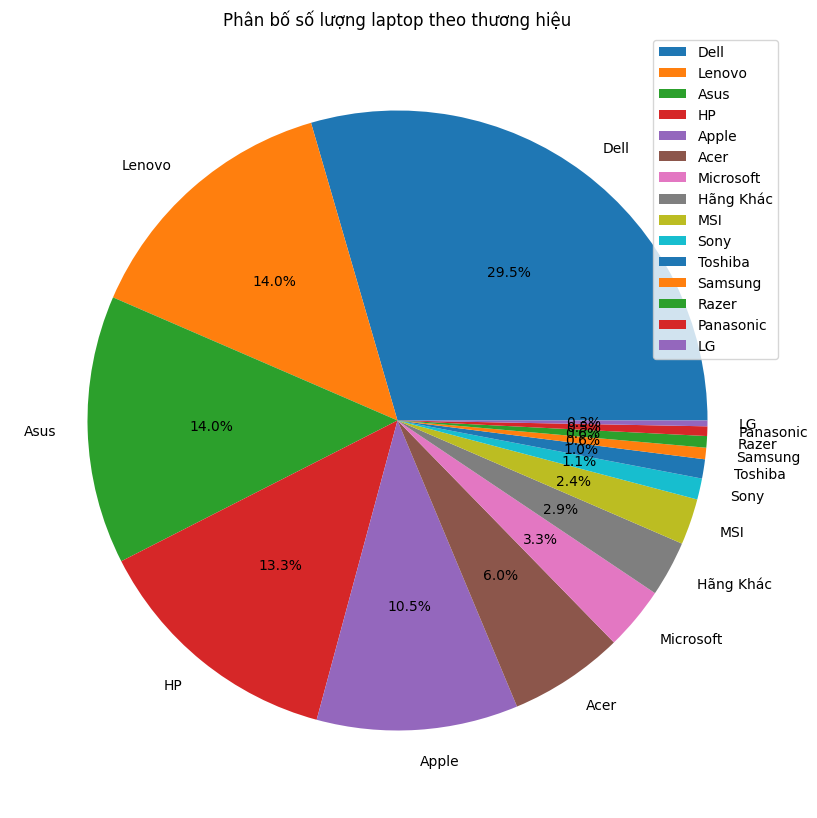

In [31]:
plt.figure(figsize=(10,15))
brands = SmallDS["PcBrand"].value_counts().sort_values(ascending=False)
plt.pie(brands.values, labels=brands.keys(), autopct='%1.1f%%')
plt.title("Phân bố số lượng laptop theo thương hiệu")
plt.legend(labels=brands.keys())
plt.show()

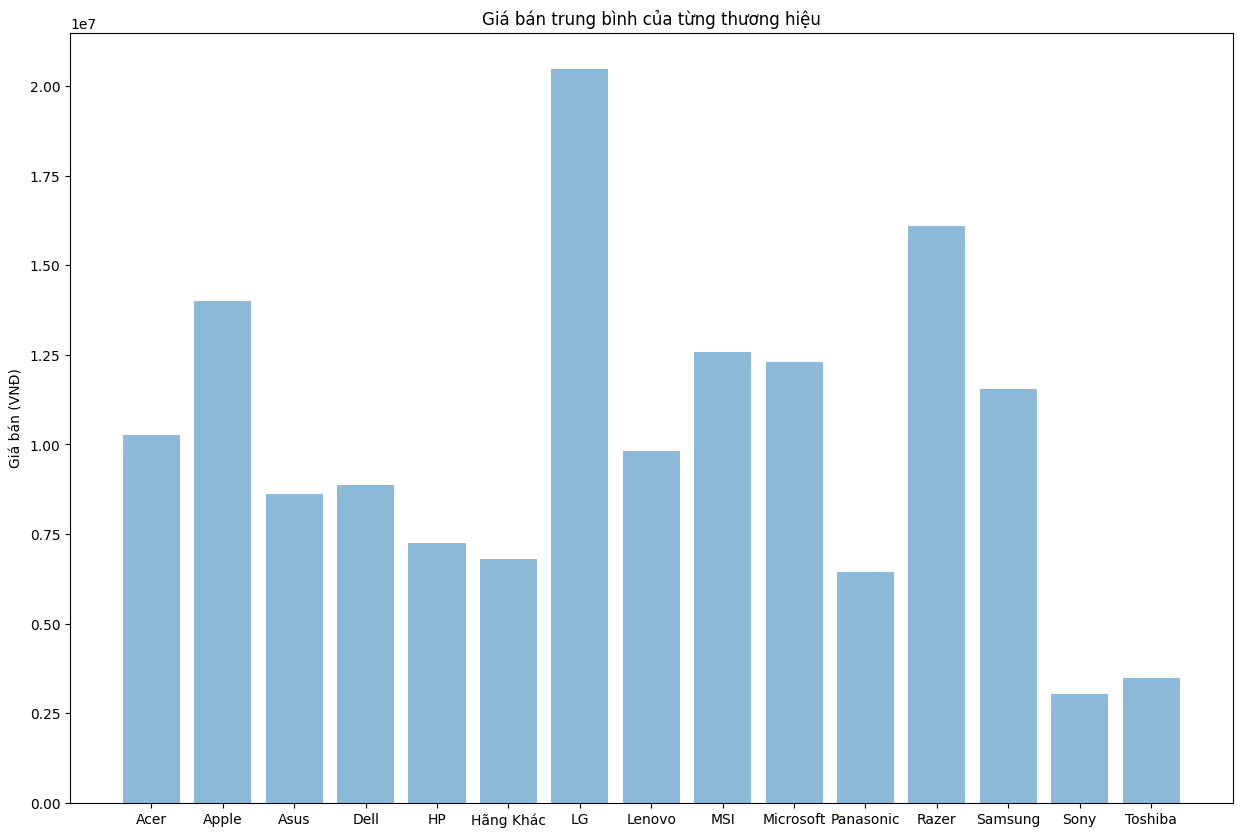

In [32]:
price_brand = SmallDS.groupby("PcBrand").mean()["Price"]
price_brand.index
plt.figure(figsize=(15,10))
plt.bar(price_brand.index, price_brand, align='center', alpha=0.5)

plt.ylabel('Giá bán (VNĐ)')
plt.title('Giá bán trung bình của từng thương hiệu')

plt.show()

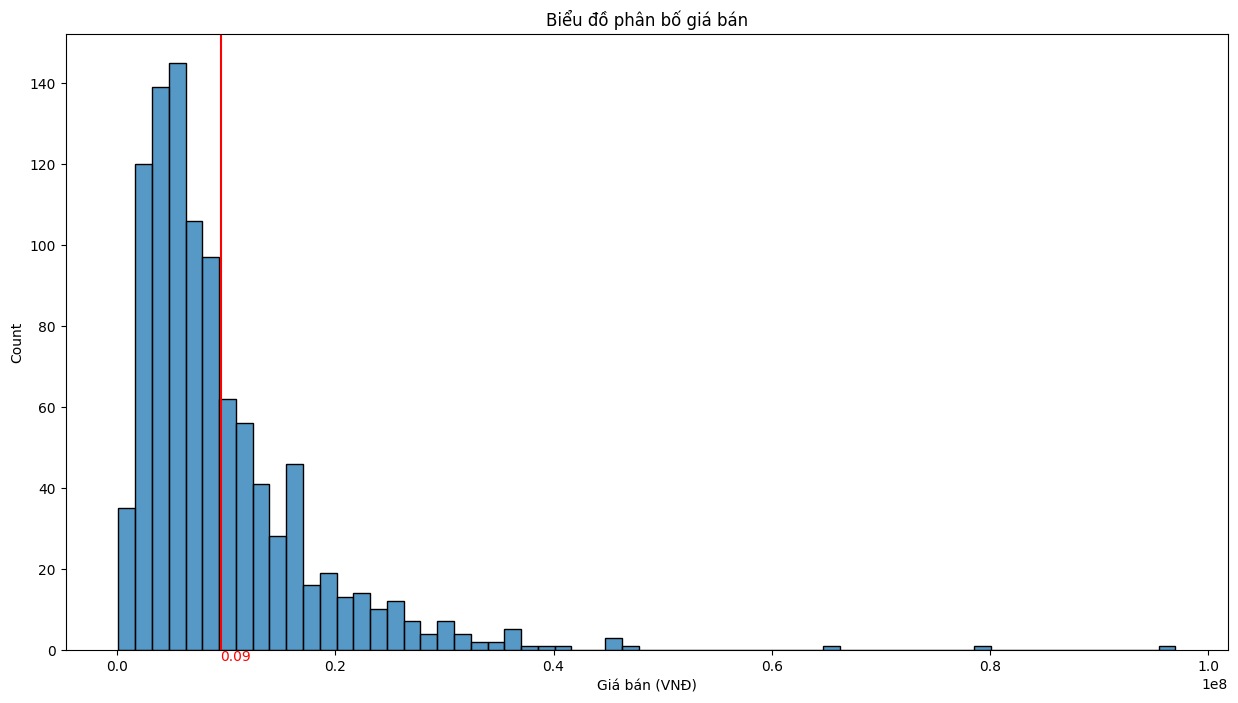

In [33]:
price_sale = SmallDS["Price"].dropna()
price_mean = price_sale.mean()
plt.figure(figsize=(15,8))
sns.histplot(data=price_sale)
plt.axvline(price_mean, color='r')
plt.xlabel('Giá bán (VNĐ)')
plt.title("Biểu đồ phân bố giá bán")
_price_mean = price_mean / 1e8
plt.text(price_mean, 0, f'{_price_mean:.2f}', color='r', verticalalignment='top', horizontalalignment='left')
plt.show()

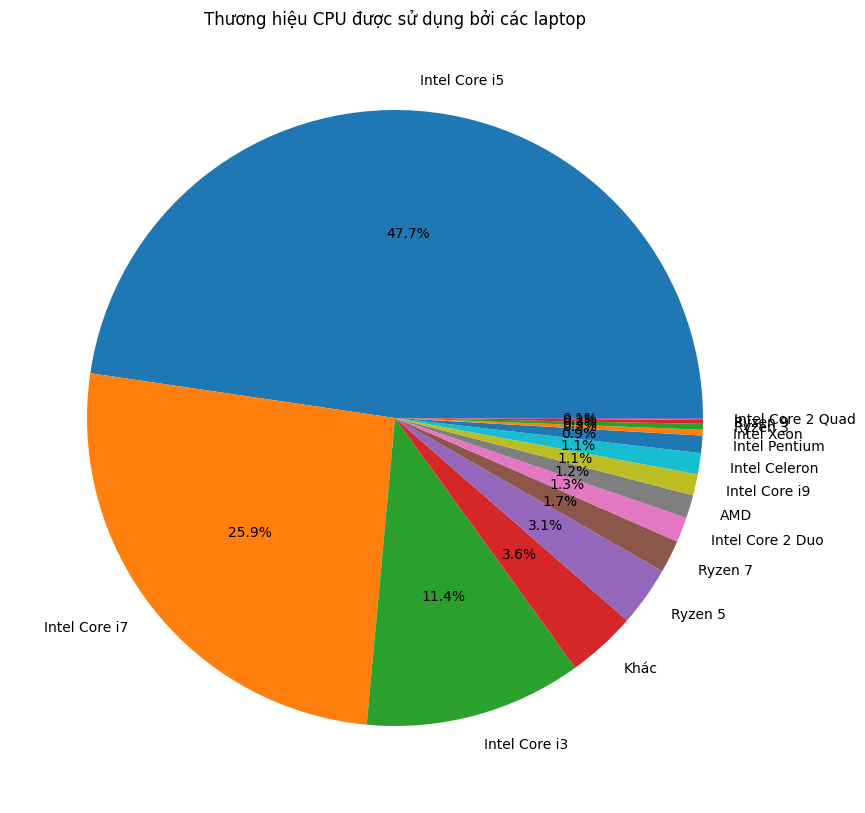

In [34]:
plt.figure(figsize=(10,10))
cpu = SmallDS["PcCpu"].value_counts().sort_values(ascending=False)
plt.pie(cpu.values, labels=cpu.keys(), autopct='%1.1f%%')
plt.title("Thương hiệu CPU được sử dụng bởi các laptop")
plt.show()

## 3. TRÍCH XUẤT ĐẶC TRƯNG 
### 3.1 LÀM SẠCH DỮ LIỆU TRỐNG

In [35]:
df = pd.read_csv("clean data/SmallDS.csv")
df.drop('ProductName', axis=1, inplace=True)

Kiểm Tra Dữ Liệu Bị Khuyết Thiếu

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1000 non-null   float64
 1   PcBrand           1000 non-null   object 
 2   PcModel           1000 non-null   object 
 3   EltCondition      1000 non-null   object 
 4   EltWarranty       750 non-null    float64
 5   LaptopScreenSize  975 non-null    float64
 6   PcCpu             990 non-null    object 
 7   PcRam             997 non-null    float64
 8   PcVga             935 non-null    object 
 9   PcDriveCapacity   997 non-null    float64
 10  EltOrigin         81 non-null     object 
 11  Address           1000 non-null   object 
 12  ShopRating        794 non-null    float64
 13  Comments          773 non-null    float64
dtypes: float64(7), object(7)
memory usage: 109.5+ KB


In [37]:
print(df.isnull().sum())

Price                 0
PcBrand               0
PcModel               0
EltCondition          0
EltWarranty         250
LaptopScreenSize     25
PcCpu                10
PcRam                 3
PcVga                65
PcDriveCapacity       3
EltOrigin           919
Address               0
ShopRating          206
Comments            227
dtype: int64


Drop cột EltOrigin vì tỉ lệ giá trị trống quá lớn

In [38]:
df.drop('EltOrigin', axis=1, inplace=True)

Xử lý dữ liệu trống kiểu category

In [39]:
df["PcCpu"].fillna(random.choice(df[df["PcCpu"] != np.nan]["PcCpu"]), inplace=True)
df["PcVga"].fillna(random.choice(df[df["PcVga"] != np.nan]["PcVga"]), inplace=True)

In [40]:
def random_impute(data, column):
    random_sample = data[column].dropna().sample(
        data[column].isnull().sum(), random_state=0)
    random_sample.index = data[data[column].isnull()].index
    data.loc[data[column].isnull(), column] = random_sample
    return data

Xử lý dữ liệu trống các cột kiểu numerical

In [41]:
from sklearn.impute import IterativeImputer
columns_with_missing = ['EltWarranty', 'LaptopScreenSize', 'PcRam', 'PcDriveCapacity', 'ShopRating', 'Comments']

def fill_missing_value(data, type):
    for column in columns_with_missing:
        if type == 'mean':
            data[column] = data[column].fillna(data[column].dropna().mean())
        if type == 'median':    
            data[column] = data[column].fillna(data[column].dropna().median())
        if type == 'mode':
            data[column] = data[column].fillna(data[column].mode().iloc[0])
        if type == 'random':
            data = random_impute(data, column)
        if type == 'any':
            data[column].fillna(method='ffill', inplace=True)
        if type == 'arbitrary':
            data[column] = data[column].fillna(0)
        elif type == 'iterative':
            imputer = IterativeImputer()
            data[column] = imputer.fit_transform(data[[column]])
    return data

Kiểm tra hàm điền dữ liệu trống

In [42]:
print(fill_missing_value(df.copy(),'random').isnull().sum())

Price               0
PcBrand             0
PcModel             0
EltCondition        0
EltWarranty         0
LaptopScreenSize    0
PcCpu               0
PcRam               0
PcVga               0
PcDriveCapacity     0
Address             0
ShopRating          0
Comments            0
dtype: int64


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
modelRegression = RandomForestRegressor(n_estimators=100, random_state=42)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Hàm kiểm tra hiệu suất sử dụng MAPE - Giá trị thu được càng nhỏ (gần 0) càng tốt

In [44]:
def test_model(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=2, stratify=y)
    train_data = pd.concat([X_train, y_train], axis=1)
    X_new= train_data.drop(columns=['Price'])
    y_new= train_data['Price']
    test_data = pd.concat([X_test, y_test], axis=1)
    X_new_t= test_data.drop(columns=['Price'])
    y_new_t= test_data['Price']

    modelRegression.fit(X_new, y_new) # huấn luyện mô hình (fit mô hình vào tập train)
    y_pred=modelRegression.predict(X_new_t) 
    mape = mean_absolute_percentage_error(y_new_t, y_pred)

    return mape

Hàm chia X,y và mã hoá lên dữ liệu category sử dụng LabelEncoding hoặc OneHotEncoder trong trường hợp cho độ lỗi nhỏ hơn

In [45]:
def split(data):
    cols = ['Price', 'EltWarranty', 'LaptopScreenSize', 'PcRam', 'PcDriveCapacity', 'ShopRating', 'Comments', 'PcBrand', 'PcModel', 'EltCondition', 'PcCpu', 'PcVga']
    cols1 = ['EltWarranty', 'LaptopScreenSize', 'PcRam', 'PcDriveCapacity', 'ShopRating', 'Comments', 'PcBrand', 'PcModel', 'EltCondition', 'PcCpu', 'PcVga']
    data = data[cols]

    # Xử lí ngoại lệ cho Price
    upper_Price = data['Price'].mean() + 3*data['Price'].std()
    # print("upper", upper_Price)
    data.loc[data['Price']>=upper_Price,'Price']=upper_Price

    # Chia Price thành 10 khoảng và gán số thứ tự cho từng khoảng
    data['Price_scope'] = pd.cut(data['Price'], bins=10, labels=False)

    X=data.drop(columns=['Price_scope'])
    y=data['Price_scope']
    X1 = X.copy()
    
    label_encoder = LabelEncoder()

    # Mã hoá cột 'PcBrand'
    X1['PcBrand'] = label_encoder.fit_transform(X1['PcBrand'])

    # Mã hoá cột 'PcModel'
    X1['PcModel'] = label_encoder.fit_transform(X1['PcModel'])

    # Mã hoá cột 'EltCondition'
    X1['EltCondition'] = label_encoder.fit_transform(X1['EltCondition'])

    # Mã hoá cột 'PcCpu'
    X1['PcCpu'] = label_encoder.fit_transform(X1['PcCpu'])

    # Mã hoá cột 'PcVga'
    X1['PcVga'] = label_encoder.fit_transform(X1['PcVga'])

    # Mã hoá các cột kiểu category dùng One Hot Encoder
    one_hot_PcBrand = pd.get_dummies(X['PcBrand'])
    X = pd.concat([X, one_hot_PcBrand], axis=1)
    X.drop('PcBrand', axis=1, inplace=True)
    one_hot_PcModel = pd.get_dummies(X['PcModel'])
    X = pd.concat([X, one_hot_PcModel], axis=1)
    X.drop('PcModel', axis=1, inplace=True)
    one_hot_EltCondition = pd.get_dummies(X['EltCondition'])
    X = pd.concat([X, one_hot_EltCondition], axis=1)
    X.drop('EltCondition', axis=1, inplace=True)
    one_hot_PcCpu = pd.get_dummies(X['PcCpu'])
    X = pd.concat([X, one_hot_PcCpu], axis=1)
    X.drop('PcCpu', axis=1, inplace=True)
    one_hot_PcVga = pd.get_dummies(X['PcVga'])
    X = pd.concat([X, one_hot_PcVga], axis=1)
    X.drop('PcVga', axis=1, inplace=True)

    if test_model(X1,y) < test_model(X, y):
        return X1,y
    return X,y


In [46]:
import pandas as pd
import warnings
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

print("Đánh giá sau khi xử lý dữ liệu trống")

fill_missing_value_types = ['mean', 'median', 'mode', 'any', 'random', 'arbitrary', 'iterative']

results = {}

for fill_missing_value_type in fill_missing_value_types:
    filled_df = fill_missing_value(df.copy(), fill_missing_value_type)
    split_df = split(filled_df)
    mape = test_model(*split_df)
    results[fill_missing_value_type] = mape

result_table = pd.DataFrame(data=results, index=['mape'])


lowest_value = result_table.min().min()
lowest_column = result_table.min().idxmin()

styled_table = result_table.style.applymap(lambda x: 'background-color: red; color: black' if x == lowest_value else 'background-color: white; color: black', subset=pd.IndexSlice[:, :])

display(HTML(styled_table.render()))


print("Điền dữ liệu trống cho lỗi thấp nhất:", lowest_column)
print("Độ lỗi:", round(lowest_value, 7))
xu_li_du_lieu_trong = lowest_value  


Đánh giá sau khi xử lý dữ liệu trống


,mean,median,mode,any,random,arbitrary,iterative
mape,0.148048,0.150578,0.152002,0.151057,0.147606,0.148099,0.148048


Điền dữ liệu trống cho lỗi thấp nhất: random
Độ lỗi: 0.1476059


### 3.2 XỬ LÝ NGOẠI LỆ

In [47]:
numerical_cols = ['EltWarranty', 'LaptopScreenSize', 'PcRam', 'PcDriveCapacity', 'ShopRating', 'Comments']
df_temp = fill_missing_value(df.copy(), 'mean')
X_numerical = df_temp[numerical_cols]

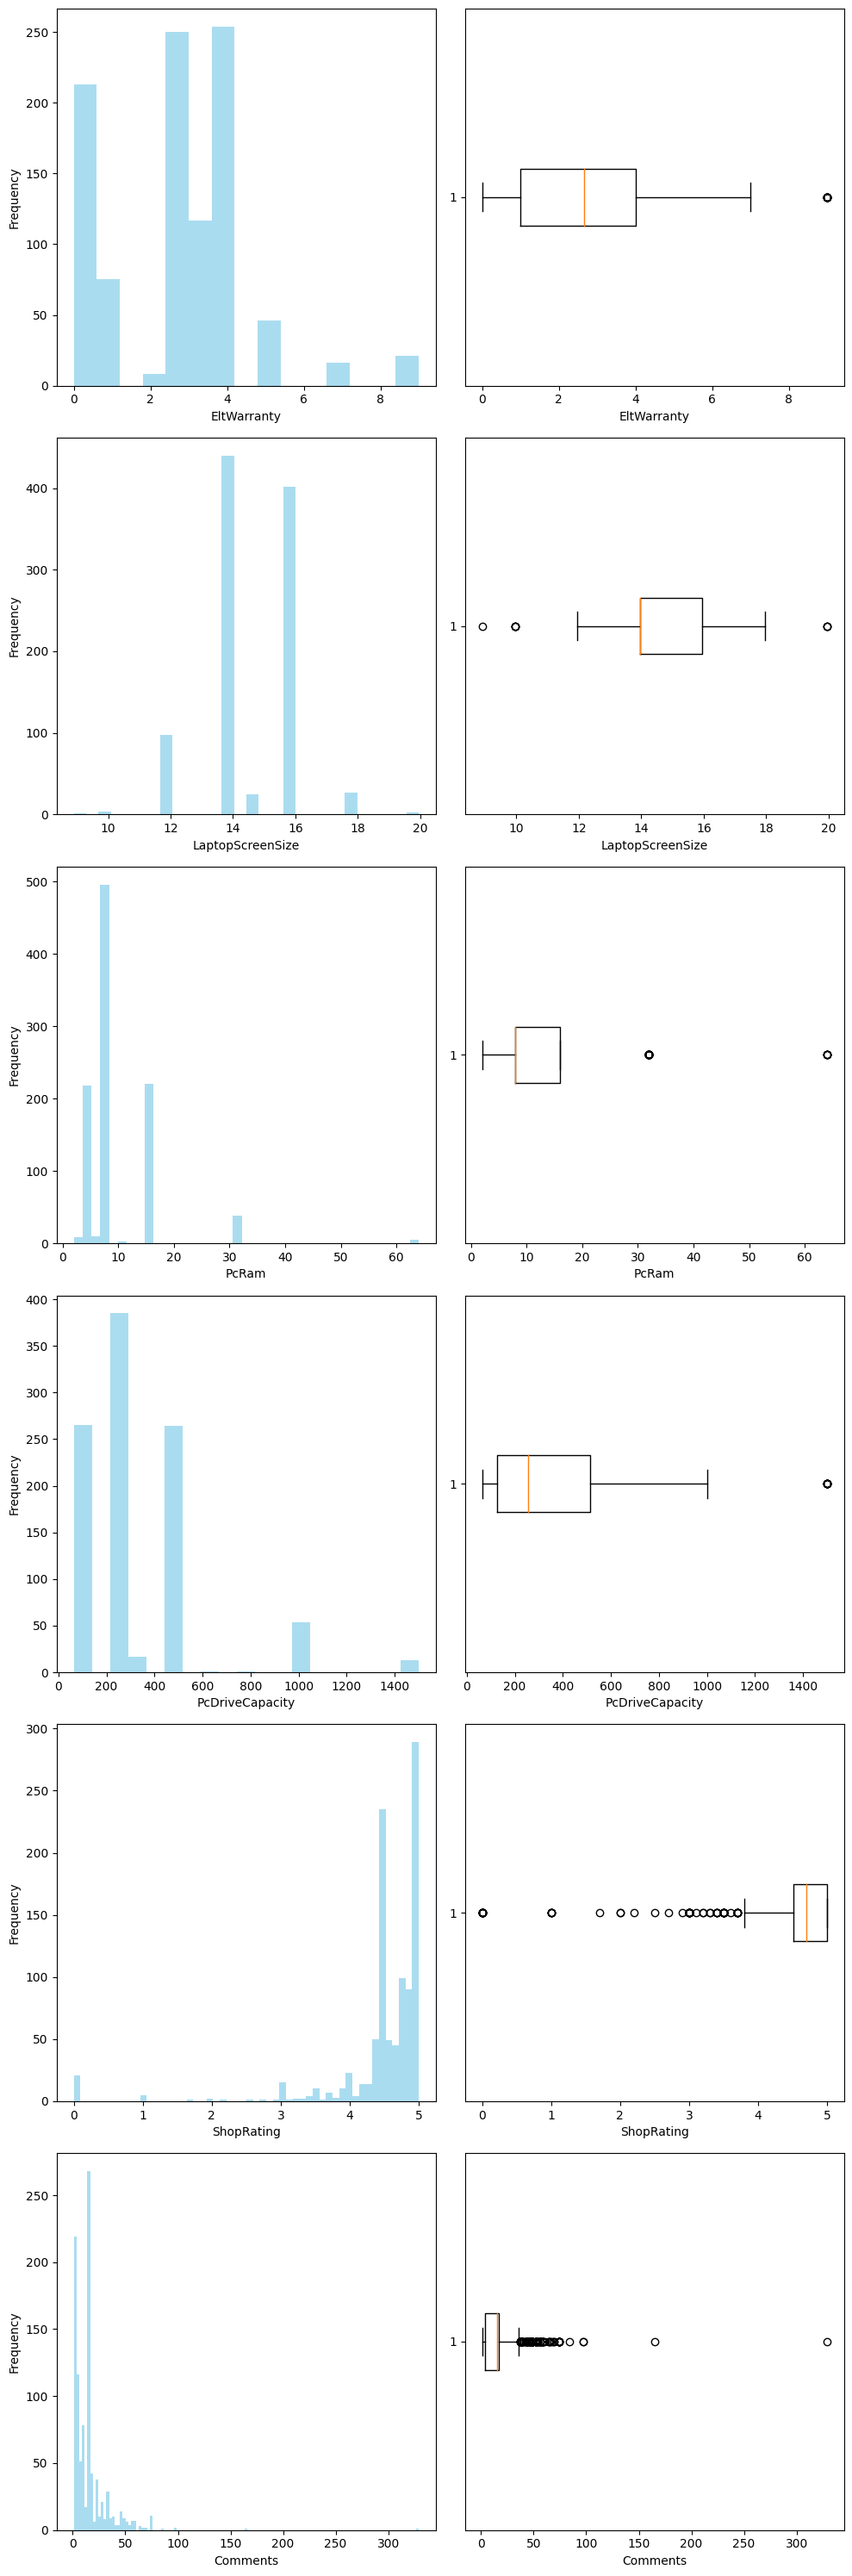

In [48]:
import matplotlib.pyplot as plt

# Plotting histograms and boxplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(10, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i, 0].hist(X_numerical[col], bins='auto', color='skyblue', alpha=0.7)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    axes[i, 1].boxplot(X_numerical[col], vert=False)
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()


Hàm xử lý ngoại lệ

In [49]:
def outlier_process(X):
    X_processed = X.copy()
    normalized_field = ['LaptopScreenSize']
    skewed_field = [col for col in numerical_cols if col != 'LaptopScreenSize']
    for col in normalized_field:
        upper_boundary = np.mean(X_processed[col]) + 3 * np.std(X_processed[col])
        lower_boundary = np.mean(X_processed[col]) - 3 * np.std(X_processed[col])
        X_processed[col] = np.where(X_processed[col] < lower_boundary, lower_boundary, X_processed[col])
        X_processed[col] = np.where(X_processed[col] > upper_boundary, upper_boundary, X_processed[col])

    for col in skewed_field:
        IQR = np.quantile(X_processed[col], 0.75) - np.quantile(X_processed[col], 0.25)
        upper_boundary = np.quantile(X_processed[col], 0.75) + (IQR * 1.5)
        lower_boundary = np.quantile(X_processed[col], 0.25) - (IQR * 1.5)
        X_processed[col] = np.where(X_processed[col] < lower_boundary, lower_boundary, X_processed[col])
        X_processed[col] = np.where(X_processed[col] > upper_boundary, upper_boundary, X_processed[col])

    return X_processed

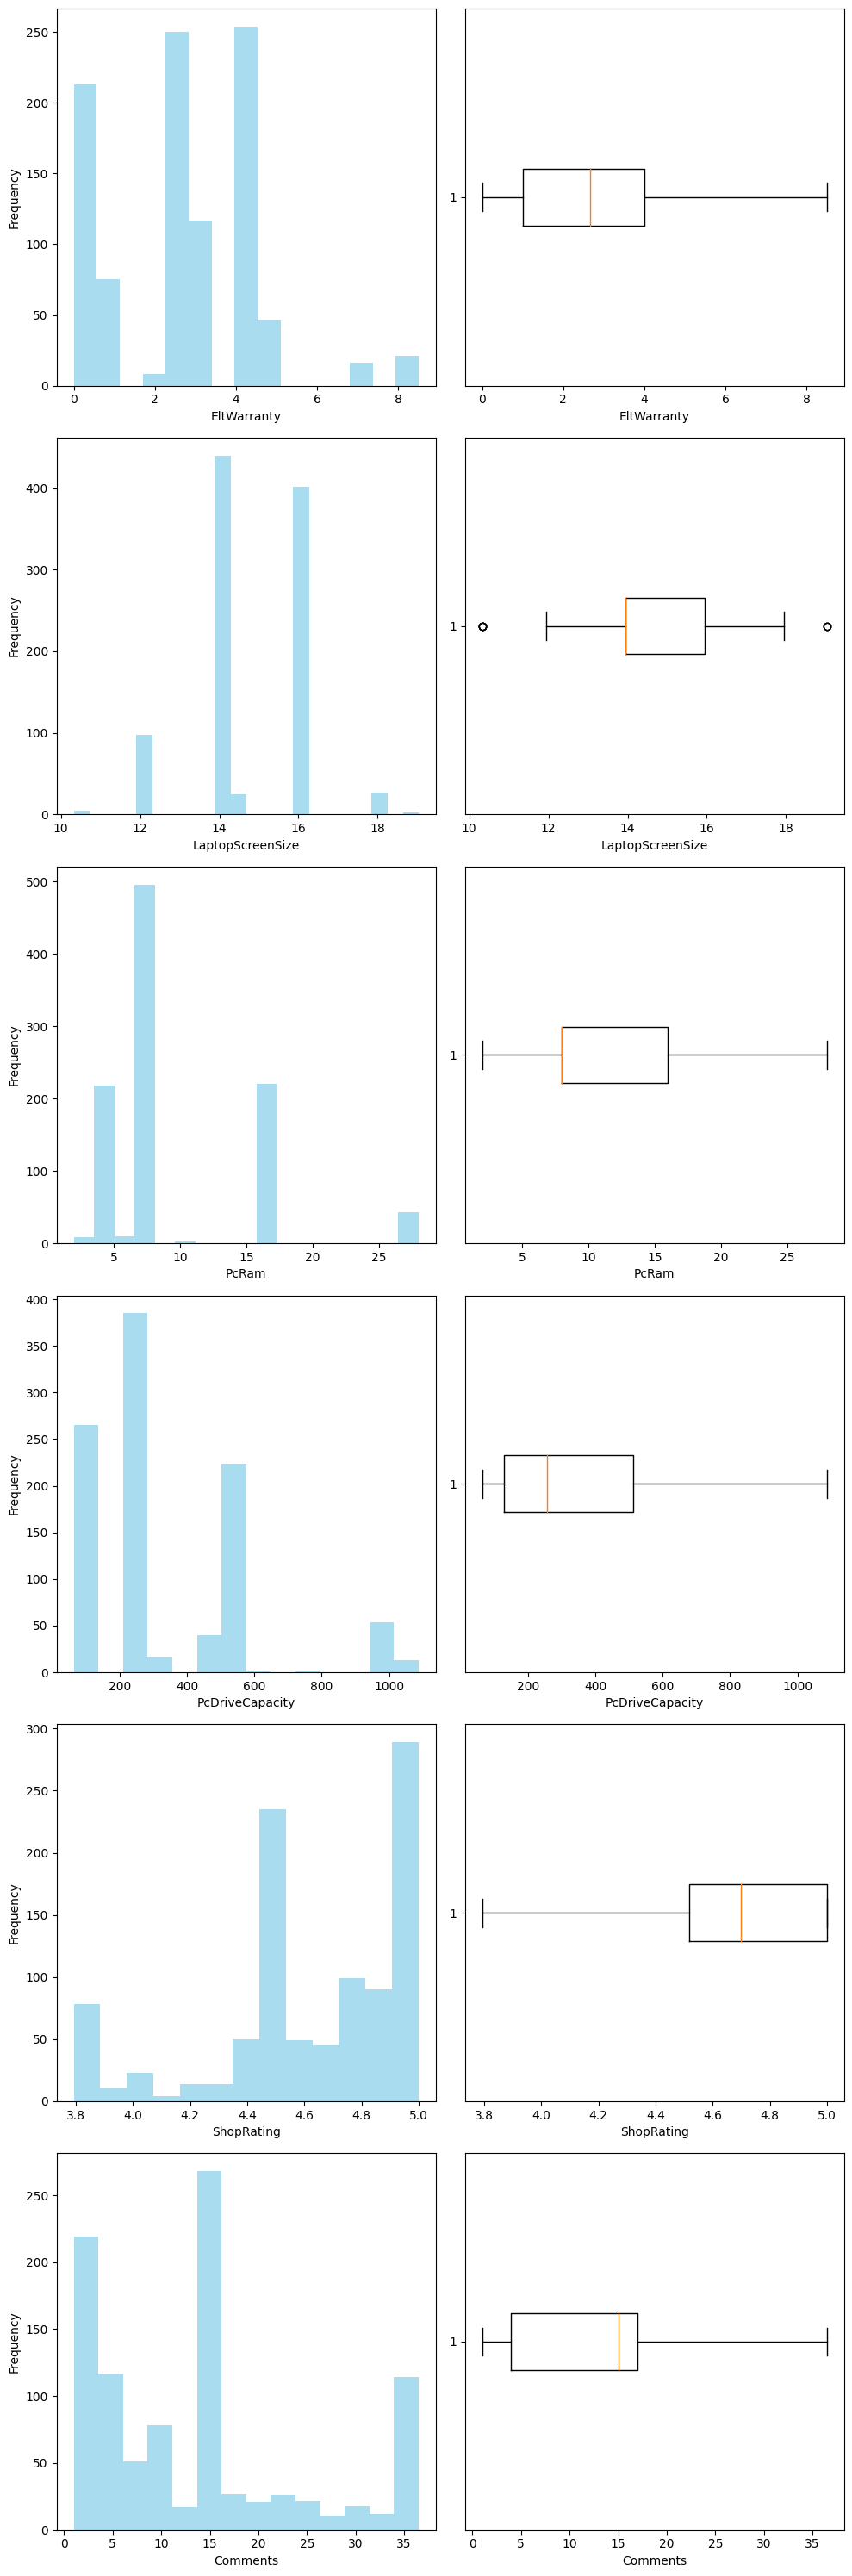

In [50]:
X_numerical = outlier_process(X_numerical)

# Plotting histograms and boxplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(10, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[i, 0].hist(X_numerical[col], bins='auto', color='skyblue', alpha=0.7)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    axes[i, 1].boxplot(X_numerical[col], vert=False)
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()


In [51]:
print("Đánh giá sau khi lọc outlier")

fill_missing_value_types = ['mean', 'median', 'mode', 'any', 'random', 'arbitrary', 'iterative']

results = {}

for fill_missing_value_type in fill_missing_value_types:
    X, y = split(fill_missing_value(df.copy(), fill_missing_value_type))
    mape = test_model(outlier_process(X), y)
    results[fill_missing_value_type] = mape

result_table = pd.DataFrame(data=results, index=['mape'])

# print(result_table)

lowest_value = result_table.min().min()  # Get the lowest cell value
lowest_column = result_table.min().idxmin()

styled_table = result_table.style.applymap(lambda x: 'background-color: red; color: black' if x == lowest_value else 'background-color: white; color: black', subset=pd.IndexSlice[:, :])

display(HTML(styled_table.render()))

print("Điền dữ liệu trống cho độ lỗi thấp nhất sau khi lọc outlier :", lowest_column)
print("Độ lỗi", lowest_value)
xu_li_ngoai_le = lowest_value
print("Độ lỗi được cải thiện so với khi chưa lọc outlier:", round(xu_li_du_lieu_trong - xu_li_ngoai_le, 7))

Đánh giá sau khi lọc outlier


,mean,median,mode,any,random,arbitrary,iterative
mape,0.148629,0.150715,0.151884,0.151847,0.148693,0.148400,0.148629


Điền dữ liệu trống cho độ lỗi thấp nhất sau khi lọc outlier : arbitrary
Độ lỗi 0.14840026252107072
Độ lỗi được cải thiện so với khi chưa lọc outlier: -0.0007944


### 3.3 Chuẩn hoá dữ liệu

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

Hàm tách X_train, X_test, y_train, y_test

In [53]:
def split_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

    train_data = pd.concat([X_train, y_train], axis=1)
    X_train = train_data.drop(columns=['Price'])
    y_train = train_data['Price']

    test_data = pd.concat([X_test, y_test], axis=1)
    X_test = test_data.drop(columns=['Price'])
    y_test = test_data['Price']

    return X_train, y_train, X_test, y_test

Áp dụng các loại chuẩn hoá

In [54]:
def normalize(X_train, y_train, X_test, y_test, type):
    if type == 'StandardScaler':
        scaler = StandardScaler()
    if type == 'MinMaxScaler':
        scaler = MinMaxScaler()
    if type == 'RobustScaler':
        scaler = RobustScaler()
    if type == 'MaxAbsScaler':
        scaler = MaxAbsScaler()
    if type == 'Normalizer':
        scaler = Normalizer()
    if type == 'QuantileTransformer':
        scaler = QuantileTransformer()
    if type == 'PowerTransformer':
        scaler = PowerTransformer()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, y_train, X_test_scaled, y_test

In [55]:
def test_model_splitted(X_train, y_train, X_test, y_test):

    modelRegression.fit(X_train, y_train)  
    y_pred = modelRegression.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return mape

In [56]:
normalize_types = ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'Normalizer', 'QuantileTransformer', 'PowerTransformer']
fill_missing_value_types = ['mean', 'median', 'mode', 'any', 'random', 'arbitrary', 'iterative']

results = {}

for fill_missing_value_type in fill_missing_value_types:
    results[fill_missing_value_type] = {}
    X, y = split(fill_missing_value(df.copy(), fill_missing_value_type))
    X_train, y_train, X_test, y_test = split_train_test(outlier_process(X), y)
    
    for normalize_type in normalize_types:
        X_train_norm, y_train_norm, X_test_norm, y_test_norm = normalize(X_train, y_train, X_test, y_test, normalize_type)
        mape = test_model_splitted(X_train_norm, y_train_norm, X_test_norm, y_test_norm)
        results[fill_missing_value_type][normalize_type] = mape
 

result_table = pd.DataFrame(data=results)

# print(result_table)

lowest_value = result_table.min().min() 
lowest_row, lowest_column = np.unravel_index(result_table.values.argmin(), result_table.shape)  
lowest_row_name = normalize_types[lowest_row]  
lowest_column_name = fill_missing_value_types[lowest_column] 

styled_table = result_table.style.applymap(lambda x: 'background-color: red; color: black' if x == lowest_value else 'background-color: white; color: black')

# Display the styled table
display(HTML(styled_table.render()))

print("\nTổ hợp cho độ lỗi thấp nhất :")
print(lowest_row_name)
print(lowest_column_name)
print("Độ lỗi", lowest_value)
chuan_hoa = lowest_value
print("Độ lỗi được cải thiện so với khi chưa chuẩn hóa:", round(xu_li_ngoai_le - chuan_hoa, 7))

,mean,median,mode,any,random,arbitrary,iterative
StandardScaler,0.148842,0.150993,0.151799,0.151575,0.148515,0.148586,0.148842
MinMaxScaler,0.148905,0.151066,0.152013,0.151728,0.148719,0.148701,0.148905
RobustScaler,0.148819,0.150835,0.151962,0.151796,0.148495,0.148503,0.148819
MaxAbsScaler,0.148632,0.150924,0.152014,0.151696,0.148454,0.148720,0.148632
Normalizer,0.179309,0.186637,0.186400,0.184012,0.183295,0.193952,0.179309
QuantileTransformer,0.148565,0.150562,0.152736,0.151274,0.148671,0.148282,0.148565
PowerTransformer,0.148694,0.150876,0.152125,0.151231,0.148658,0.147993,0.148694



Tổ hợp cho độ lỗi thấp nhất :
PowerTransformer
arbitrary
Độ lỗi 0.14799324819581458
Độ lỗi được cải thiện so với khi chưa chuẩn hóa: 0.000407


### 3.4 Lựa chọn đặc trưng

In [57]:
fill_missing_value_type = lowest_column_name
normalize_type = lowest_row_name

In [58]:
X, y = split(fill_missing_value(df.copy(), fill_missing_value_type))
X_Train, y_Train, X_Test, y_Test = split_train_test(outlier_process(X), y)
X_train, y_train, X_test, y_test = normalize(X_Train, y_Train, X_Test, y_Test, normalize_type)

In [59]:
feature_names = X.columns
feature_names = feature_names.drop('Price')

Hàm chọn đặc trưng sử dụng RFE

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def RFE_features_select(X_train, y_train):
    # Tạo mô hình hồi quy tuyến tính
    model = LinearRegression()

    # Sử dụng RFE để lựa chọn đặc trưng
    rfe = RFE(model)
    rfe.fit(X_train, y_train)

    return len(rfe.support_)

max_features = RFE_features_select(X_train, y_train)
print('Số đặc trưng tối đa để áp dụng cho K-Best:', max_features)


Số đặc trưng tối đa để áp dụng cho K-Best: 118


Áp dụng K-Best để chọn các đặc trưng tốt nhất

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression


def KBest_features_select(X_train, y_train, X_test, y_test, max_features):
    lowest_mape = float('inf')
    best_k = 0
    best_X_train_selected = None
    best_X_test_selected = None
    mape_values = []

    for k in range(1, max_features + 1, 10):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = X_test[:, selector.get_support(indices=True)]
        mape = test_model_splitted(X_train_selected, y_train, X_test_selected, y_test)
        mape_values.append(mape)
        if mape < lowest_mape:
            lowest_mape = mape
            best_k = k
            best_X_train_selected = X_train_selected
            best_X_test_selected = X_test_selected
    
    print("Lowest MAPE:", lowest_mape)
    print("Best k:", best_k)
    # Plotting the graph
    x = np.arange(1, max_features + 1, 10)
    plt.plot(x, mape_values, marker='o')
    plt.xlabel("Number of Features")
    plt.ylabel("MAPE")
    plt.title("Number of Features vs. MAPE")
    plt.grid(True)
    plt.show()
    
    return best_X_train_selected, y_train, best_X_test_selected, y_test, lowest_mape, best_k

Lowest MAPE: 0.14784877655105796
Best k: 101


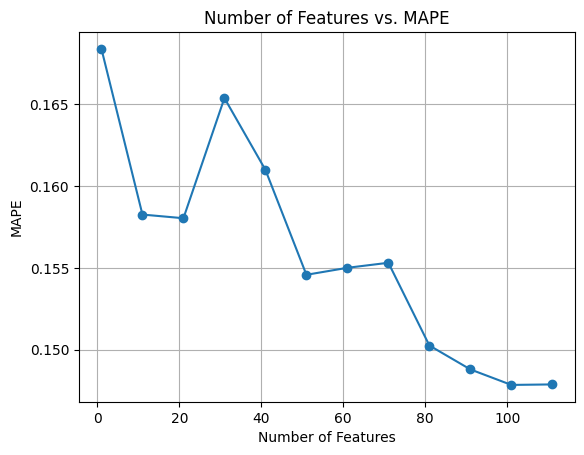

Độ lỗi được cải thiện so với khi chưa lựa chọn đặc trưng: 0.0001445


In [62]:
X_train, y_train, X_test, y_test, lua_chon_dac_trung, best_k = KBest_features_select(X_train, y_train, X_test, y_test, max_features)
print("Độ lỗi được cải thiện so với khi chưa lựa chọn đặc trưng:", round(chuan_hoa - lua_chon_dac_trung, 7))

### 3.5 Giảm chiều dữ liệu

Kĩ thuật PCA giảm chiểu dữ liệu

In [63]:
def test_model_pca(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return mean_absolute_percentage_error(y_test, y_pred)

In [64]:
from sklearn.decomposition import PCA

for i in range(1, best_k, 10):
  pca = PCA(n_components=i)
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  error = test_model_pca(X_train_pca,X_test_pca, y_train, y_test)

  print(f"PCA {i} : độ lỗi là {error} cải thiện {lua_chon_dac_trung - error}")

PCA 1 : độ lỗi là 0.6220525931334981 cải thiện -0.47420381658244015
PCA 11 : độ lỗi là 0.6000243249397118 cải thiện -0.4521755483886538
PCA 21 : độ lỗi là 0.5521822396606934 cải thiện -0.40433346310963536
PCA 31 : độ lỗi là 0.5408435874115818 cải thiện -0.3929948108605238
PCA 41 : độ lỗi là 0.5191332705798221 cải thiện -0.37128449402876407
PCA 51 : độ lỗi là 0.5153750770785355 cải thiện -0.3675263005274775
PCA 61 : độ lỗi là 0.529747296851949 cải thiện -0.381898520300891
PCA 71 : độ lỗi là 0.5277845197050516 cải thiện -0.3799357431539936
PCA 81 : độ lỗi là 0.47477966021208845 cải thiện -0.3269308836610305
PCA 91 : độ lỗi là 0.4005782720882296 cải thiện -0.2527294955371716


NOTE: Kĩ thuật PCA cho lượng sai số dự đoán cao nên không được áp dụng

## 4. MÔ HÌNH HÓA DỮ LIỆU

## Chia dữ liệu thành các tập Train/Validation

In [65]:

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=2)


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math
from colorama import Fore
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Mô hình RandomForestRegressor

RandomForestRegressor là một mô hình học máy dựa trên mô hình rừng ngẫu nhiên (random forest) để dự đoán giá trị liên tục. 

Mô hình này sử dụng nhiều cây quyết định (decision tree) để dự đoán giá trị đầu ra và kết hợp kết quả từ các cây để đưa ra dự đoán cuối cùng.

## Các siêu tham số sử dụng

- n_estimators: Số lượng cây trong rừng ngẫu nhiên. 

Giá trị này thường được chọn lớn để đảm bảo tính ổn định của dự đoán. Ví dụ: [100, 200].


- max_depth: Độ sâu tối đa của cây. 

Giới hạn độ sâu này giúp tránh việc mô hình quá phức tạp và overfitting. Ví dụ: [None, 5, 10].


- min_samples_split: 
Số lượng mẫu tối thiểu cần có trong mỗi nút để tiếp tục quá trình chia. 

Giá trị này có thể giúp kiểm soát độ phức tạp của cây. Ví dụ: [2, 5].


- min_samples_leaf: Số lượng mẫu tối thiểu cần có trong mỗi lá để xem xét một phân vùng là một lá. 

Giá trị này có thể giúp tránh việc quá khớp (overfitting). Ví dụ: [1, 2, 4].

## Sử dụng GridSearchCV để tìm siêu tham số tốt nhất trên tập validation

In [67]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
# Fit mô hình trên tập train và validation
grid_search.fit(X_train_val, y_train_val)
# In ra siêu tham số tốt nhất và điểm số tương ứng
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Negative MAE): ", grid_search.best_score_)


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Negative MAE):  -776775.3823765924


## Sử dụng siêu tham số vừa tìm được để huấn luyện mô hình và dự đoán kết quả trên tập test

In [68]:
class ModelRandomForestRegressor:
    
    def __init__(self, model=None):
        if model == None:
            self.model = RandomForestRegressor()
        else:
            self.model = model
                
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def predict(self, X_test):
        self.y_pred = self.model.predict(X_test)
        return self.y_pred     

    def evaluate(self, y_true, y_pred):
        self.score_mae = mean_absolute_error(y_true, y_pred)
        self.score_rmse = math.sqrt(mean_squared_error(y_true, y_pred))
        self.score_mape = mean_absolute_percentage_error(y_true, y_pred)
        print(Fore.LIGHTCYAN_EX + 'MAE: {}'.format(self.score_mae))
        print(Fore.LIGHTYELLOW_EX + 'RMSE: {}'.format(self.score_rmse))
        print(Fore.LIGHTGREEN_EX + 'MAPE: {}'.format(self.score_mape))
        
        return self.score_mae, self.score_rmse, self.score_mape
    
    def plot_line(self, width, height, X_test, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)

        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=self.y_pred[0:100], ax=ax, color='red', label='Giá trị dự đoán')
        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=y_test[0:100], ax=ax, color='green', label='Giá trị thực tế')

        ax.set_title('Biểu đồ đường giá laptop dự đoán và thực thế')
        ax.set_xlabel(xlabel='Sample', fontsize=14)
        ax.set_ylabel(ylabel='Price', fontsize=14)
        plt.show()

    def plot_scatter(self, width, height, y_pred, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        plt.scatter(y_test, y_pred, color='red')
        plt.plot(y_test, y_test)
        plt.grid()
        plt.xlabel('Giá thực tế')
        plt.ylabel('Giá dự đoán')
        plt.title('Biểu đồ phân tán giá laptop dự đoán và thực thế')
        plt.show()

    def plot_residuals(self, width, height, y_pred, y_test): 
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        residuals = y_pred - y_test

        # Vẽ biểu đồ Residuals
        plt.scatter(y_test, residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Price')
        plt.ylabel('Residuals')
        plt.title('Biểu đồ dư thừa giá laptop dự đoán và thực tế')
        plt.show()


In [69]:
model = RandomForestRegressor(**grid_search.best_params_)
rf_reg = ModelRandomForestRegressor(model)
rf_reg.train(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)
rf_score_mae, rf_score_rmse, rf_score_mape = rf_reg.evaluate(y_test, rf_y_pred)


MAE: 771666.8587881663
RMSE: 945633.0459718594
MAPE: 0.1487491407131587


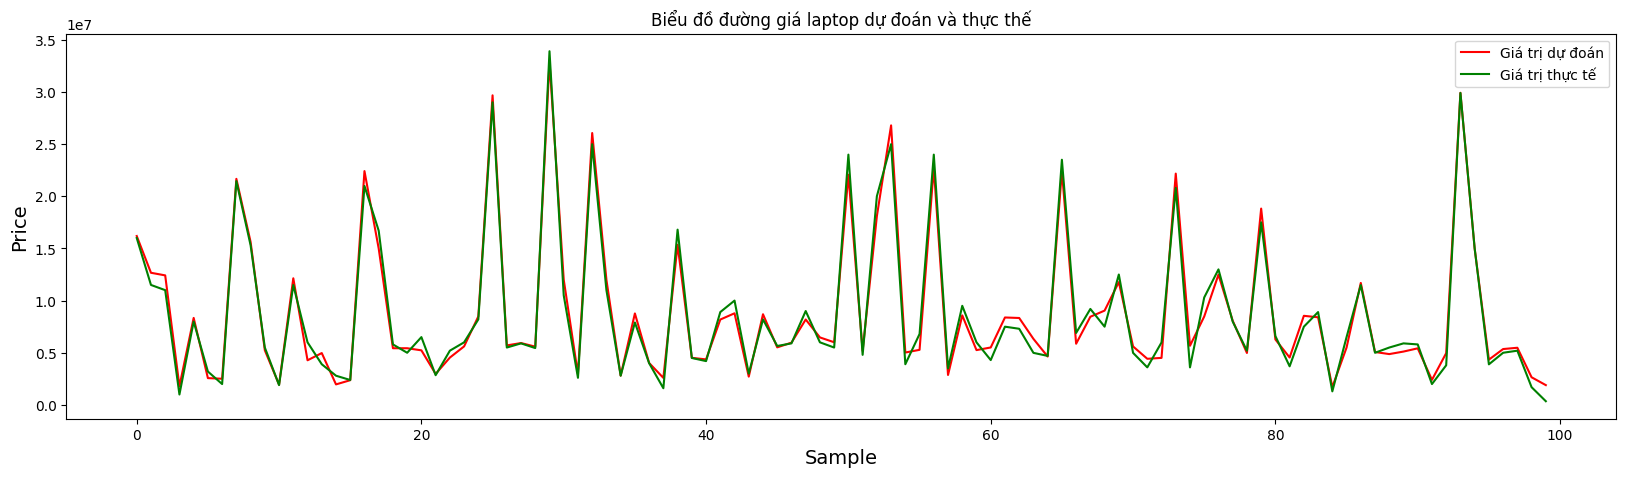

In [70]:
rf_reg.plot_line(20, 5, X_test, y_test)

Qua biểu đồ đường, ta có thể nhìn thấy được giá lap top dự đoán khá khớp với giá laptop thật

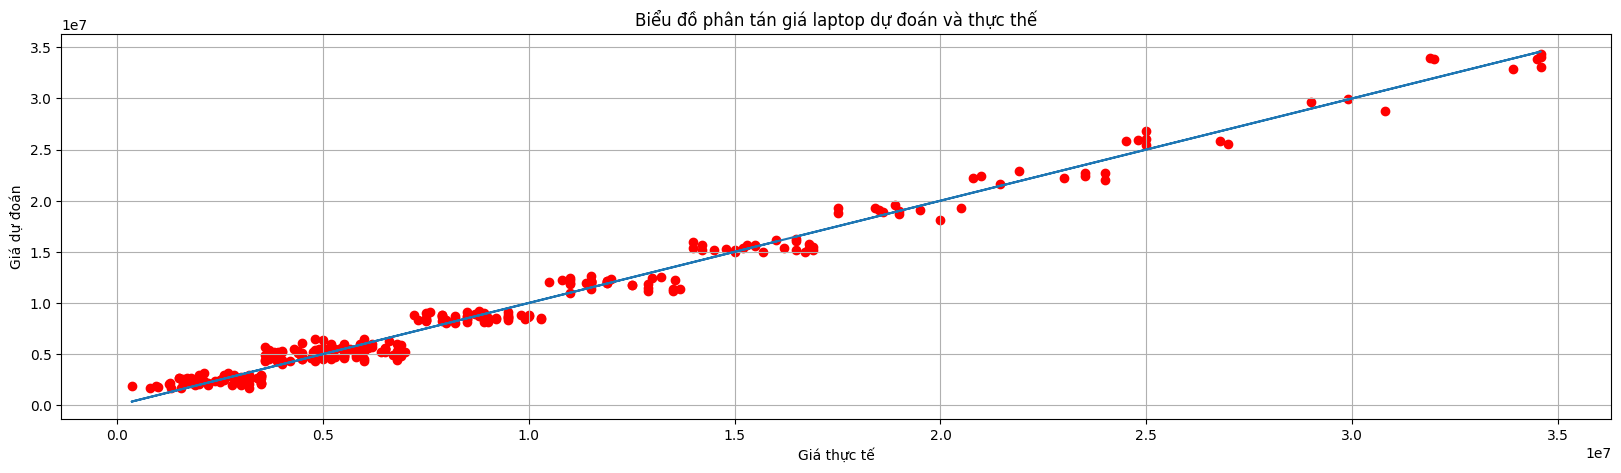

In [71]:
rf_reg.plot_scatter(20, 5, rf_y_pred, y_test)

Qua biểu đồ phân tán 
- Giá dự đoán phân tán xung quanh đường thẳng đại diện cho giá dự đoán khớp với giá thực tế
- Giá laptop càng lên cao số lượng phân bố càng thưa thớt (có lẽ là do số lượng laptop có giá cao không nhiều)

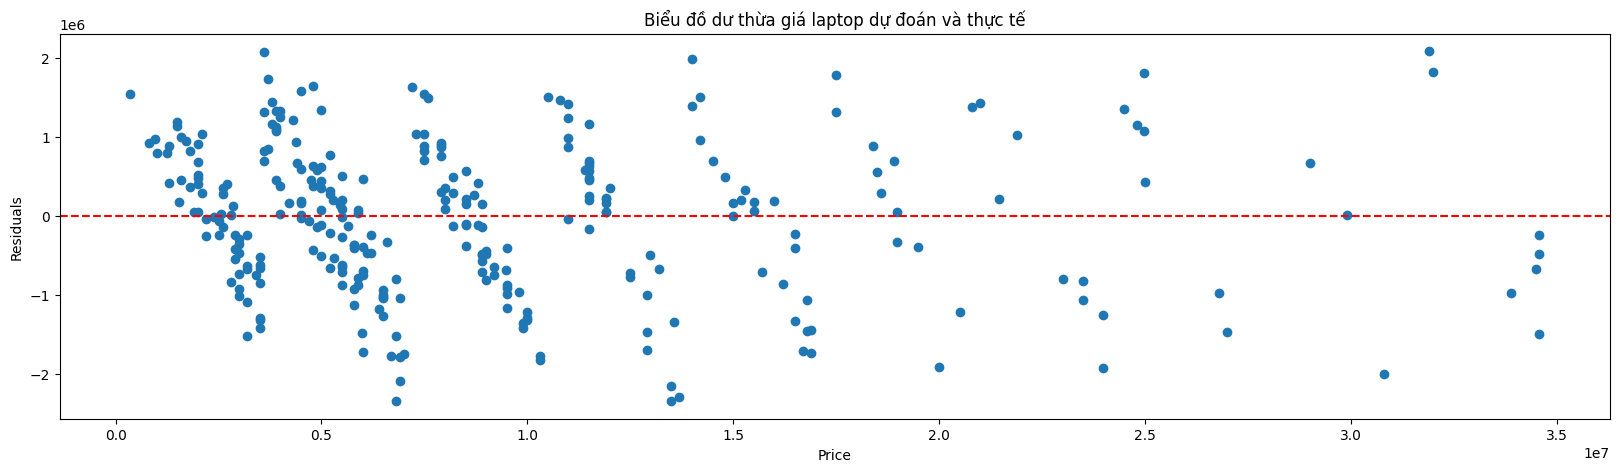

In [72]:
rf_reg.plot_residuals(20, 5, rf_y_pred, y_test)

Qua biểu đồ dư thừa:
- Ta có thể nhìn thấy được giá laptop dự đoán sai dao động trong khoảng 2 triệu. 
- Phân bố các giá trị dự đoán sai chủ yếu tập trung trong đoạn từ âm 1 đến dương 1 triệu

## Hồi quy tuyến tính (Linear Regression)

Linear Regression là một phương pháp trong Machine Learning được sử dụng để dự đoán giá trị đầu ra dựa trên các biến đầu vào. 
Mục tiêu của mô hình là tìm một đường thẳng tốt nhất (hay hyperplane trong không gian cao hơn) để phù hợp với dữ liệu huấn luyện. 
Đường thẳng này sẽ đại diện cho một hàm tuyến tính, với các hệ số và sai số được tìm hiểu từ dữ liệu huấn luyện.

## Các bộ siêu tham số sử dụng

Mô hình Linear Regression không có siêu tham số 

## Huấn luyện mô hình và dự đoán kết quả trên tập test

In [73]:
class ModelLinearRegression:
    
    def __init__(self):
        self.model = LinearRegression()
    
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        self.y_pred = self.model.predict(X_test)
        return self.y_pred
    
    def evaluate(self, y_true, y_pred):
        self.score_mae = mean_absolute_error(y_true, y_pred)
        self.score_rmse = math.sqrt(mean_squared_error(y_true, y_pred))
        self.score_mape = mean_absolute_percentage_error(y_true, y_pred)
        print(Fore.LIGHTCYAN_EX + 'MAE: {}'.format(self.score_mae))
        print(Fore.LIGHTYELLOW_EX + 'RMSE: {}'.format(self.score_rmse))
        print(Fore.LIGHTGREEN_EX + 'MAPE: {}'.format(self.score_mape))
        
        
        return self.score_mae, self.score_rmse, self.score_mape
    
    def plot_line(self, width, height, X_test, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)

        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=self.y_pred[0:100], ax=ax, color='red', label='Giá trị dự đoán')
        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=y_test[0:100], ax=ax, color='green', label='Giá trị thực tế')

        ax.set_title('Biểu đồ đường giá laptop dự đoán và thực thế')
        ax.set_xlabel(xlabel='Sample', fontsize=14)
        ax.set_ylabel(ylabel='Price', fontsize=14)
        plt.show()

    def plot_scatter(self, width, height, y_pred, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        plt.scatter(y_test, y_pred, color='red')
        plt.plot(y_test, y_test)
        plt.grid()
        plt.xlabel('Giá thực tế')
        plt.ylabel('Giá dự đoán')
        plt.title('Biểu đồ phân tán giá laptop dự đoán và thực thế')
        plt.show()

    def plot_residuals(self, width, height, y_pred, y_test): 
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        residuals = y_pred - y_test

        # Vẽ biểu đồ Residuals
        plt.scatter(y_test, residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Price')
        plt.ylabel('Residuals')
        plt.title('Biểu đồ dư thừa giá laptop dự đoán và thực tế')
        plt.show()

MAE: 833576.5761206367
RMSE: 1015888.5613073256
MAPE: 0.16744637065294699


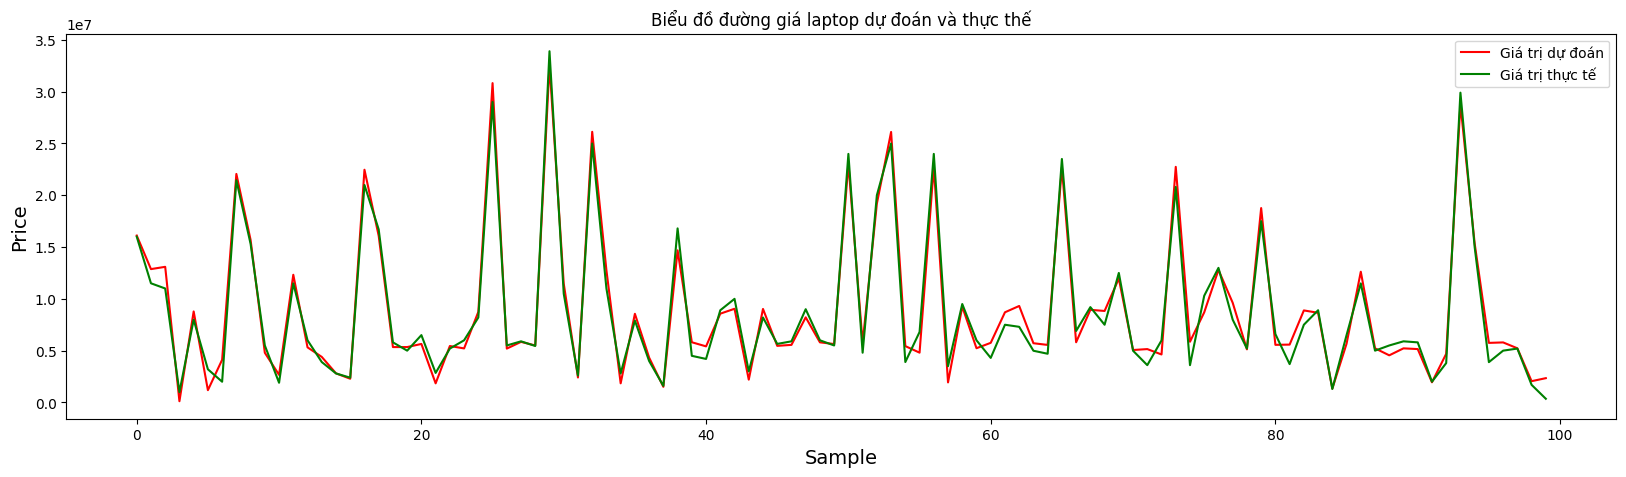

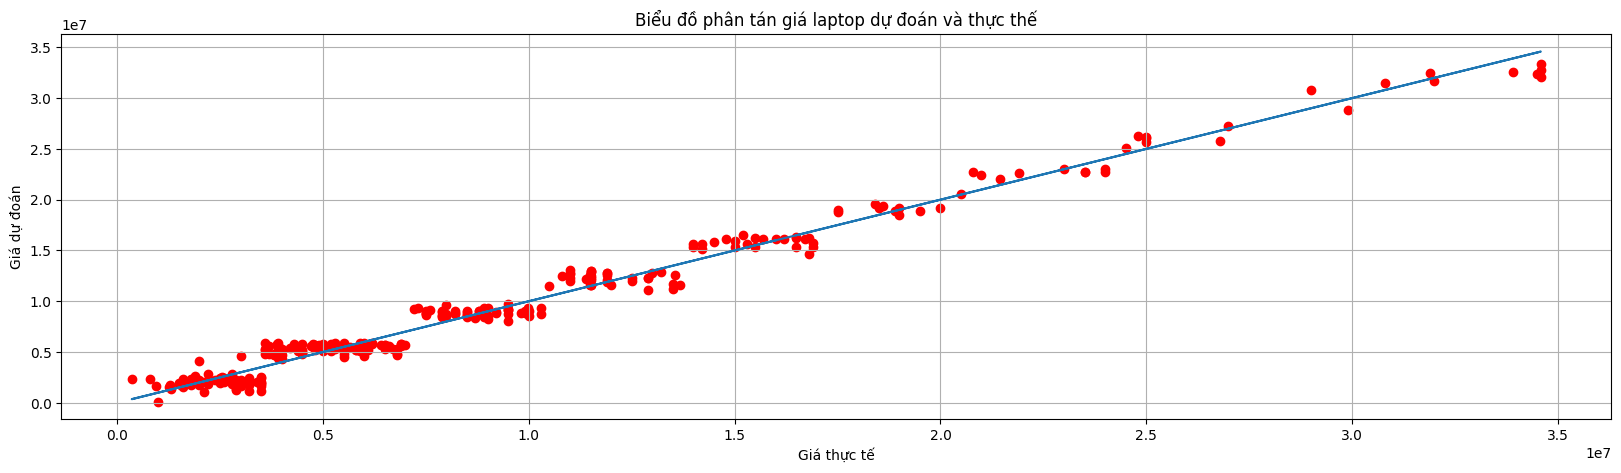

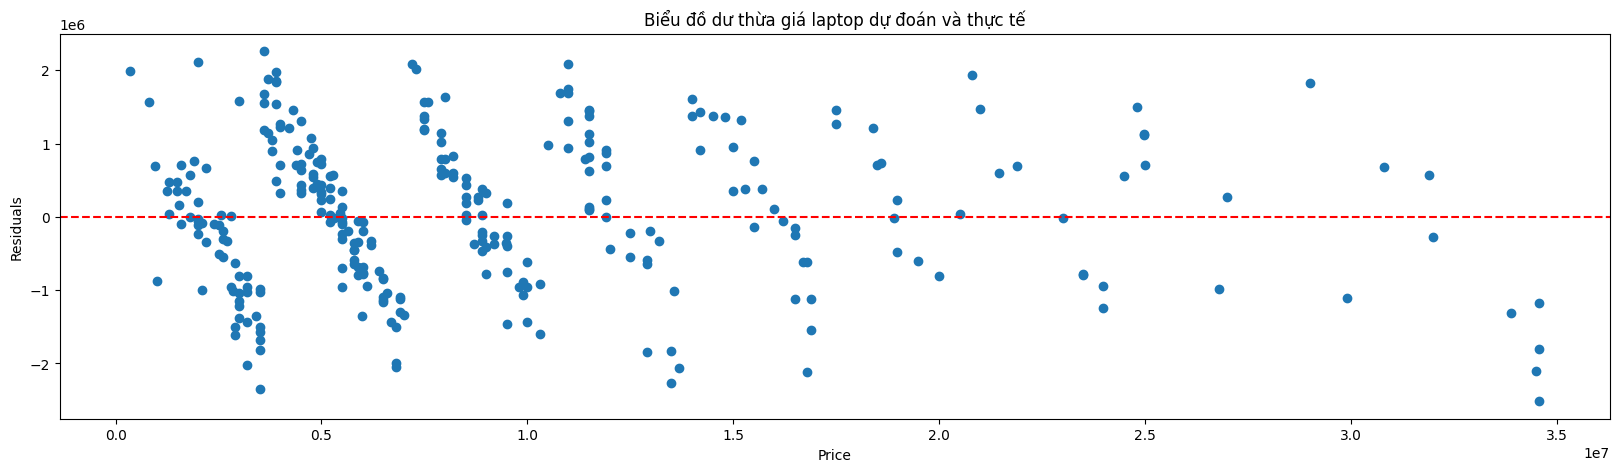

In [74]:
linear_reg = ModelLinearRegression()
linear_reg.train(X_Train, y_Train)
linear_y_pred = linear_reg.predict(X_Test)
linear_score_mae, linear_score_rmse, linear_score_mape = linear_reg.evaluate(y_Test, linear_y_pred)
linear_reg.plot_line(20, 5, X_Test, y_Test)
linear_reg.plot_scatter(20, 5, linear_y_pred, y_Test)
linear_reg.plot_residuals(20, 5, linear_y_pred, y_Test)

## So sánh hiệu quả của các mô hình

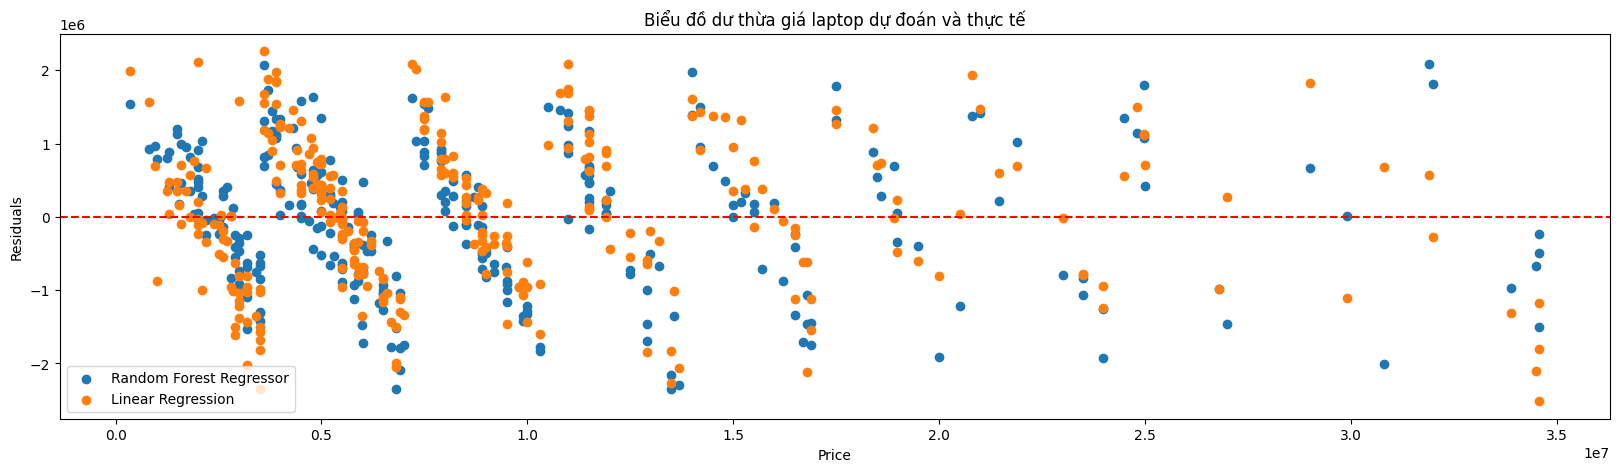

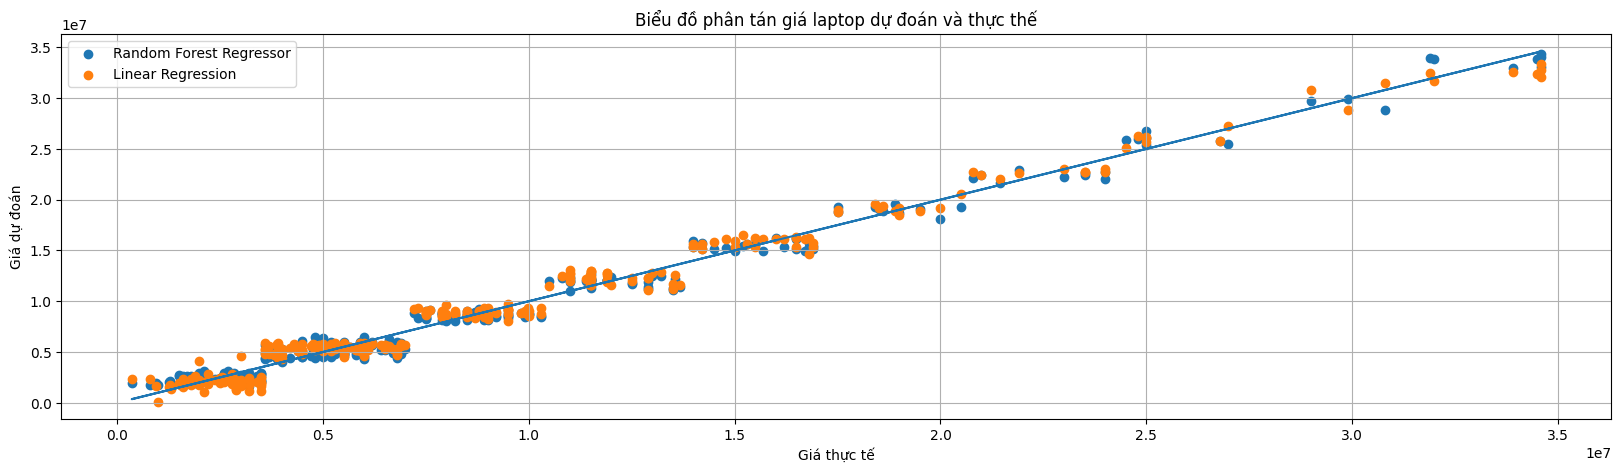

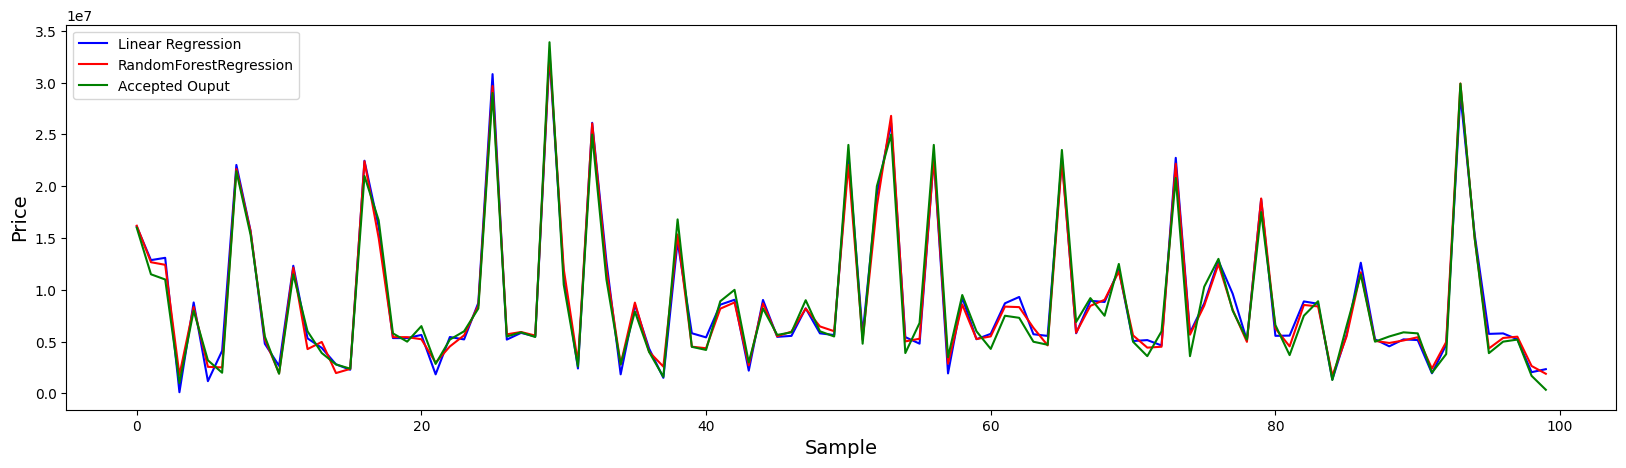

,Model,MAE,RMSE,MAPE
0,Random Forest Regressor,771666.9,945633.0,0.149
1,Linear Regression,833576.6,1015888.6,0.167


In [75]:
# Vẽ biểu đồ Residuals
height = 5
width = 20
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(20)

rf_residuals = rf_y_pred - y_test
linear_residuals = linear_y_pred - y_test

plt.scatter(y_test, rf_residuals, label='Random Forest Regressor')
plt.scatter(y_test, linear_residuals, label='Linear Regression')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.title('Biểu đồ dư thừa giá laptop dự đoán và thực tế')
plt.legend()
plt.show()

# Vẽ biểu đồ Scatter
height = 5
width = 20
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(20)
plt.scatter(y_test, rf_y_pred, label='Random Forest Regressor')
plt.scatter(y_test, linear_y_pred, label='Linear Regression')
plt.plot(y_test, y_test)
plt.grid()
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('Biểu đồ phân tán giá laptop dự đoán và thực thế')
plt.legend()
plt.show()


# Vẽ biểu đồ Line
height = 5
width = 20
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(20)

sns.lineplot(x=range(0, X_test[:100].shape[0]), y=linear_y_pred[:100], ax=ax, color='blue', label='Linear Regression')
sns.lineplot(x=range(0, X_test[:100].shape[0]), y=rf_y_pred[:100], ax=ax, color='red', label='RandomForestRegression')
sns.lineplot(x=range(0, X_test[:100].shape[0]), y=y_test[:100], ax=ax, color='green', label='Accepted Ouput') 

ax.set_xlabel(xlabel='Sample', fontsize=14)
ax.set_ylabel(ylabel='Price', fontsize=14)
plt.show()

# Tạo dictionary với các giá trị
data = {
    'Model': ['Random Forest Regressor', 'Linear Regression'],
    'MAE': [rf_score_mae, linear_score_mae],
    'RMSE': [rf_score_rmse, linear_score_rmse],
    'MAPE': [rf_score_mape, linear_score_mape]
}

# Tạo DataFrame từ dictionary
df = pd.DataFrame(data)

# Làm tròn giá trị và định dạng chuỗi
df['MAE'] = df['MAE'].apply(lambda x: '{:.1f}'.format(round(x, 1)))
df['RMSE'] = df['RMSE'].apply(lambda x: '{:.1f}'.format(round(x, 1)))
df['MAPE'] = df['MAPE'].apply(lambda x: '{:.3f}'.format(round(x, 3)))

# Tạo màu cho DataFrame
styled_df = df.style.applymap(lambda x: 'background-color: green')

# In ra DataFrame với định dạng chuỗi mới
styled_df


Qua ba biểu đồ trên ta có thể thấy rõ nhất sự chênh lệch kết quả của 2 mô hình nhờ biểu đồ dư thừa và biểu đồ đường:
- Biểu đồ dư thừa: giá dự đoán dư thừa so với trục x thì Linear Regresessor bị lệch ra ngoài nhiều hơn với Random Forest Regression
- Biểu đồ phân tán: không nhìn ra được sự khác biệt lớn
- Biểu đồ đường: đường dự đoán của mô hình Random Forest Regression gần với đường giá thực tế hơn so với đường mô hình Linear Regression 
 

## Kết luận

Trong bài toán dự đoán giá laptop, với dataset gồm 1000 mẫu được crawl từ web chottot.com:

Trong phần trích xuất đặc trưng việc áp dụng các kĩ thuật như xử lí dự liệu trống, xử lí ngoại lệ, chuẩn hóa dữ liệu và lựa chọn đặc trưng không tác động lớn vào kết quả dự đoán. 

Ngược lại trong mô hình hóa dữ liệu việc chọn các mô hình và thuật toán phù hợp có ảnh hướng đến kết quả dự đoán.

Cụ thể mô hình Random Forest Regression cho kết quả dự đoán tốt hơn ~2% so với dự đoán bằng mô hình Linear Regression